# Transforming word vectors

Para traduzir uma palavra em inglês para o francês, uma maneira seria gerar uma lista extensa de palavras em inglês e suas correspondentes em francês. Se você pedir a um humano para fazer isso, encontraria alguém que conhece ambos os idiomas para começar a fazer a lista. Se você quiser que uma máquina aprenda a fazer isso, você calcularia embeddings de palavras associadas ao inglês e embeddings de palavras associadas ao francês. Em seguida, recuperaria o embedding da palavra em inglês, como "cat", e encontraria uma maneira de transformar esse embedding em um embedding que tenha o significado no espaço vetorial das palavras em francês.

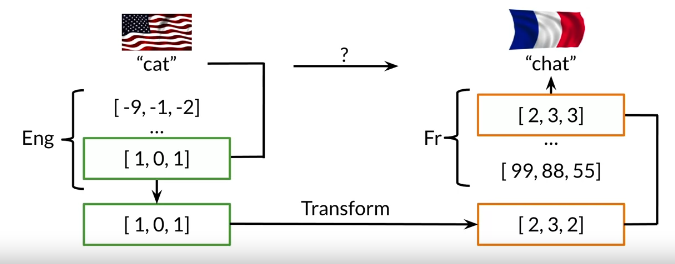

Para fazer isso, você converterá o espaço vetorial de palavras em inglês para o espaço vetorial de palavras em francês. Em seguida, você pegará o vetor de palavras transformado e procurará os vetores de palavras no espaço vetorial francês que são mais semelhantes a ele. As palavras mais semelhantes são candidatas para sua tradução. Se sua máquina fizer um bom trabalho, ela poderá encontrar a palavra "chat", que é a palavra francesa para "cat". Você quer encontrar a matriz que pode fazer essa transformação para você.

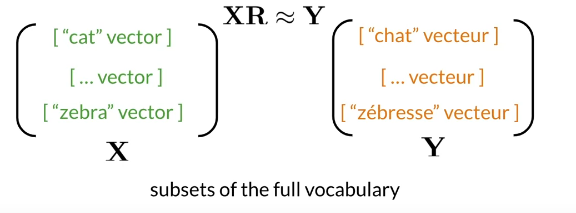

Agora que sabemos que pode haver uma matriz que transforma nossos vetores de palavras em inglês em vetores de palavras relevantes em francês, como definimos essa matriz de transformação, que denotaremos como R? Podemos começar com uma matriz R selecionada aleatoriamente e ver como ela se comporta. Quando você tenta traduzir os vetores em inglês na matriz X e os compara com os vetores reais de palavras em francês na matriz Y. 
Para que isso funcione, você precisará primeiro obter um subconjunto de palavras em inglês e seus equivalentes em francês. Obtenha seus respectivos vetores de palavras e empilhe os vetores de palavras nas respectivas matrizes, X e Y. A chave aqui é manter as linhas alinhadas, ou alinhar os vetores de palavras. Isso significa que, se a primeira linha da matriz X contiver a palavra "cat", então a primeira linha da matriz Y deve conter a palavra francesa para "cat", que é "chat".

Agora você pode estar se perguntando: "Espere um minuto. Se eu já tenho as palavras em inglês e suas traduções em francês, por que preciso treinar um modelo para fazer isso? Por que não apenas salvar essas informações em um mapeamento de chave-valor, como um dicionário Python?" Bem, a vantagem é que você pode coletar apenas um subconjunto dessas palavras para encontrar sua matriz de transformação. E, se ela funcionar bem, o modelo pode ser usado para traduzir palavras que não fazem parte do seu conjunto de treinamento original. Portanto, você só precisa treinar em um subconjunto do vocabulário inglês-francês, e não no vocabulário inteiro.

Então, vamos ver como encontrar a matriz R ideal. Primeiro, comparamos a tradução $ X \cdot R $ com os embeddings reais das palavras em francês na matriz $ Y $. Fazemos isso multiplicando a matriz $ X $ pela matriz $ R $ e subtraindo a matriz $ Y $. Vou explicar em mais detalhes o que essa expressão significa e também o que significa esse subscrito F maiúsculo. Por enquanto, pense nisso como uma medida de quão distante a tradução tentativa está dos vetores reais em francês.

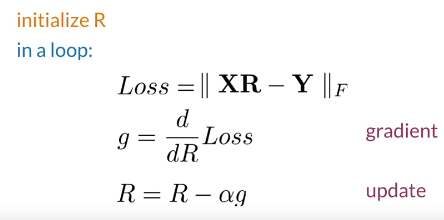

Se você começar com uma matriz $ R $ aleatória, pode melhorar gradualmente essa matriz $ R $ em um loop. Primeiro, calcule o gradiente tomando a derivada dessa função de perda em relação à matriz $ R $. Em seguida, atualize a matriz $ R $ subtraindo o gradiente, mas note que é o gradiente ponderado pela taxa de aprendizado alfa. Você pode escolher um número fixo de vezes para percorrer o loop ou verificar a perda em cada iteração e sair do loop quando a perda cair abaixo de um certo limite.

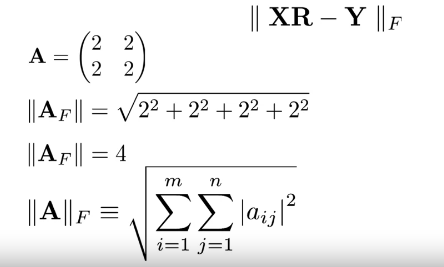

Agora, vamos explicar o que essa notação significa, o que as duas barras verticais duplas significam. Isso mede a magnitude ou a norma de uma matriz. Vamos ver um exemplo de cálculo dessa norma e, em seguida, ver a fórmula geral. Digamos que o resultado de $ X \cdot R - Y $ seja uma matriz. Vamos supor, para este exemplo, que há apenas duas palavras neste dicionário, que é o número de linhas na matriz. E os embeddings das palavras têm duas dimensões. Então, as matrizes $ X $, $ R $, $ Y $ e $ A $ são todas matrizes 2x2. Se a matriz $ A $ se parecer com isso, então para calcular sua norma, tomamos $2^2 + 2^2 + 2^2 + 2^2$ e depois tomamos a raiz quadrada. Isso nos dá quatro. Essa norma tem o subscrito F porque é chamada de norma de Frobenius.

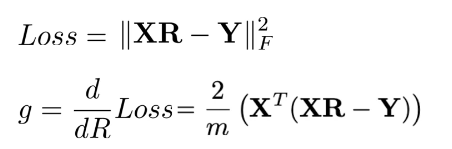

Agora, vamos detalhar como calcular o gradiente da função de perda. A perda é definida como o quadrado da norma de Frobenius, o gradiente é a derivada da perda em relação à matriz $ R $. O escalar $ M $ é o número de linhas ou palavras no subconjunto que estamos usando para treinamento. Se você se lembra do cálculo, isso pode parecer familiar para você se fingir que $ R $ é uma variável única em vez de uma matriz. E $ X $ e $ Y $ são constantes.

O motivo pelo qual usamos o quadrado da norma de Frobenius. É mais fácil tomar a derivada dessa expressão, em vez de lidar com as raízes quadradas que estão na norma de Frobenius.

# Rotation matrices in R2

## Transformando Vetores

Existem três transformações principais de vetores:
* Escala
* Translação
* Rotação

A operação de rotação muda a direção de um vetor, deixando sua dimensionalidade e sua norma inalteradas.

In [38]:
import numpy as np                     # Importa numpy para manipulação de arrays
import matplotlib.pyplot as plt        # Importa matplotlib para gráficos

In [39]:
# Procedimento para plotar setas que representam vetores com pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        if vec.shape[0] == 1:     # vetor linha
            x_dir.append(vec[0][0])
            y_dir.append(vec[0][1])
        elif vec.shape[1] == 1:   # vetor coluna
            x_dir.append(vec[0][0])
            y_dir.append(vec[1][0])
    
    if ax is None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes is None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        if vec.shape[0] == 1:     # vetor linha
            ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
        elif vec.shape[1] == 1:   # vetor coluna
            ax2.arrow(0, 0, vec[0][0], vec[1][0], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax is None:
        plt.show()
        fig.savefig(fname)

# Exemplo 1

In [40]:
# Cria uma matriz 2 x 2
R = np.array([[-2, 0],
              [0, 2]])
R

# Cria um vetor linha como um array NumPy com uma única linha
x = np.array([[1, 1]])

O produto escalar entre uma matriz quadrada e a transposta de um vetor linha produz uma rotação e escalonamento do vetor original.

Lembre-se de que a maneira recomendada para obter o produto escalar em Python é `np.dot(a, b)`:

In [41]:
y = np.dot(R, x.T) # Aplica o produto escalar entre R e x.T
y                  # Vetor coluna como um array NumPy com uma única coluna

array([[-2],
       [ 2]])

Vamos usar o Pyplot para inspecionar visualmente o efeito da rotação em vetores 2D.

Agora podemos plotar o vetor $\vec{x} = [1, 1]$ em um plano cartesiano. O plano cartesiano será centrado em `[0,0]` e seus limites x e y estarão entre `[-4, +4]`.

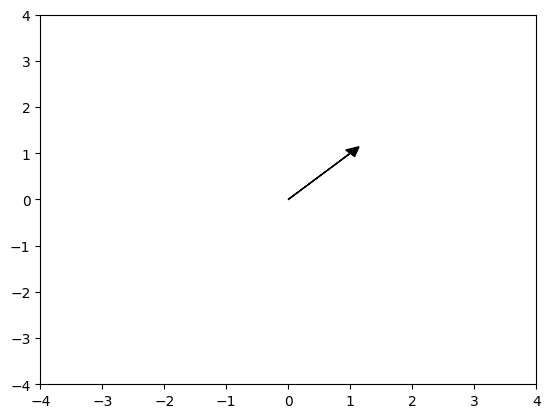

In [42]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

Agora, vamos plotar no mesmo sistema nosso vetor $\vec{x} = [1, 1]$ e o produto escalar da matriz com $x.T$.

$$
R = \begin{bmatrix} -2 & 0 \\ 0 & 2 \end{bmatrix}
$$

$$
y = R \cdot x.T
$$

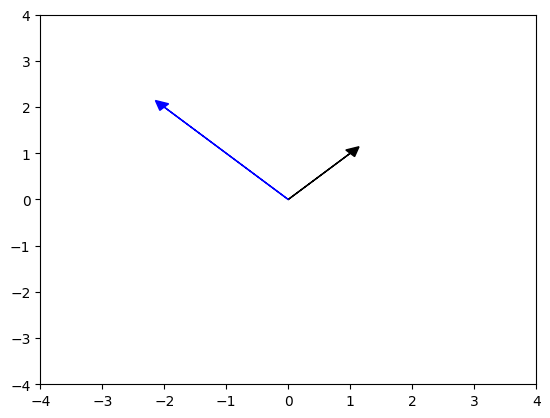

In [43]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

Note que o vetor `x` (preto) é transformado no vetor `y` (azul).

### Exemplo 2

Dados compostos por 2 atributos reais pertencem a um espaço $ \mathbb{R} \times \mathbb{R} $ ou $ \mathbb{R}^2 $. Matrizes de rotação em $ \mathbb{R}^2 $ rotacionam um vetor $\vec{x}$ por um ângulo $\theta$ no sentido anti-horário em um sistema de coordenadas fixo. Matrizes de rotação são da forma:

$$
Ro = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}
$$

**(Nota:** Este notebook usa $ y = Ro \cdot x.T $, mas se você usar $ y = x \cdot Ro $, as matrizes de rotação em $ \mathbb{R}^2 $ rotacionam um vetor $\vec{x}$ por um ângulo $\theta$ no sentido horário em um sistema de coordenadas fixo**).

As funções trigonométricas no Numpy exigem o ângulo em radianos, não em graus. Na próxima célula, definimos uma matriz de rotação que rotaciona vetores no sentido anti-horário por $100^\circ$.

In [44]:
angle = 100 * (np.pi / 180) # Converte graus para radianos

Ro = np.array([[np.cos(angle), -np.sin(angle)],
               [np.sin(angle), np.cos(angle)]])

x2 = np.array([[2, 2]])    # Vetor linha como um array NumPy
y2 = np.dot(Ro, x2.T)

print('Matriz de rotação')
print(Ro)
print('\nVetor rotacionado')
print(y2)

print('\n Norma de x2', np.linalg.norm(x2))
print('\n Norma de y2', np.linalg.norm(y2))
print('\n Norma da matriz de rotação', np.linalg.norm(Ro))

Matriz de rotação
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Vetor rotacionado
[[-2.31691186]
 [ 1.62231915]]

 Norma de x2 2.8284271247461903

 Norma de y2 2.82842712474619

 Norma da matriz de rotação 1.414213562373095


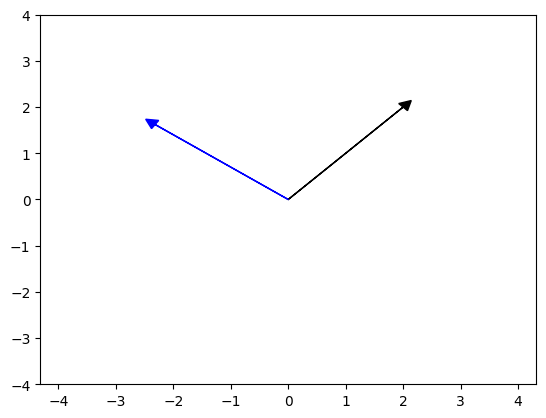

In [45]:
plot_vectors([x2, y2], fname='transform_02.svg')

Alguns pontos a serem observados:

* A norma do vetor de entrada é a mesma que a norma do vetor de saída. Matrizes de rotação não modificam a norma do vetor, apenas sua direção.
* A norma de qualquer matriz de rotação em $R^2$ é sempre $\sqrt{2} = 1.414221$.

## Norma de Frobenius

A norma de Frobenius é a generalização para $R^2$ da já conhecida função de norma para vetores:

$$
\| \vec{a} \| = \sqrt{\vec{a} \cdot \vec{a}}
$$

Para uma dada matriz $A$ em $R^2$, a norma de Frobenius é definida como:

$$
\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{ij}\right|^{2}}
$$

`np.square()` é uma maneira de elevar ao quadrado cada elemento de uma matriz. Seu resultado é equivalente ao uso do operador * com arrays do NumPy.


In [46]:
A = np.array([[2, 2],
              [2, 2]])

In [47]:
A_squared = np.square(A)
A_squared

A_squared = A * A
A_squared

array([[4, 4],
       [4, 4]])

Agora você pode somar os elementos do array resultante e, em seguida, obter a raiz quadrada da soma.

In [48]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

Essa foi a versão estendida da função `np.linalg.norm()`. Você pode verificar que ela produz o mesmo resultado.

In [49]:
print('Norma de Frobenius da matriz de rotação')
print(np.sqrt(np.sum(Ro * Ro)), '==', np.linalg.norm(Ro))

Norma de Frobenius da matriz de rotação
1.414213562373095 == 1.414213562373095


# K-nearest neighbors

Uma operação fundamental necessária para encontrar uma palavra correspondente é encontrar os k vizinhos mais próximos de um vetor. Perceba que uma transformação ou o vetor após a transformação, se for um embedding através de uma matriz R, estaria no espaço vetorial de palavras em francês. No entanto, não será necessariamente idêntico a nenhum dos vetores de palavras no espaço vetorial de palavras em francês. Você precisa procurar nos vetores de palavras francesas reais para encontrar uma palavra francesa que seja semelhante àquela que você criou a partir da transformação. Você pode encontrar palavras como "salut" ou "bonjour", que podem ser retornadas como a tradução francesa da palavra "hello".

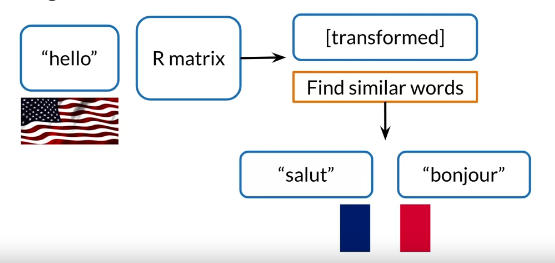

Então, a questão é, como você encontra vetores de palavras semelhantes? Para entender como encontrar vetores de palavras semelhantes, vamos olhar para uma pergunta relacionada. Como você encontra seus amigos que moram perto? Vamos imaginar que você está visitando San Francisco, nos Estados Unidos, e está visitando seu querido amigo Andrew. Você também quer visitar seus outros amigos no fim de semana, de preferência aqueles que moram perto. Uma maneira de fazer isso é vasculhar sua agenda de endereços e, para cada amigo, obter o endereço deles e calcular a distância de San Francisco. Um amigo está em Xangai, outro está em Bangalore e outro está em Los Angeles. Você pode classificar seus amigos pelas distâncias até San Francisco e, em seguida, classificá-los por proximidade. Observe que, se você tiver muitos amigos, esse é um processo muito demorado. Existe uma maneira mais eficiente de fazer isso?

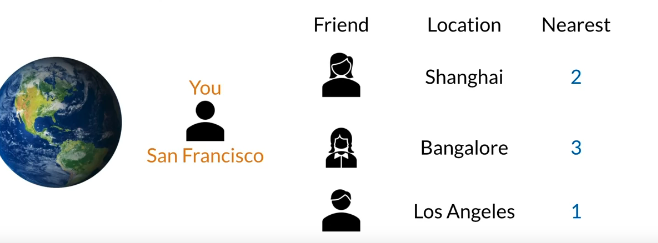

Perceba que dois desses amigos vivem em outro continente, enquanto o terceiro amigo vive nos Estados Unidos. Você poderia ter procurado apenas um subconjunto de amigos que moram nos Estados Unidos. Você pode ter percebido que pode não ser necessário vasculhar todos os seus amigos no seu endereço para encontrar os mais próximos de você. Você pode imaginar que, se pudesse filtrar de alguma forma quais amigos estavam todos em uma região geral, como a América do Norte, poderia procurar apenas dentro desse subgrupo de amigos. Se houver uma maneira de dividir o espaço geográfico em regiões, você poderia procurar apenas dentro dessas regiões.

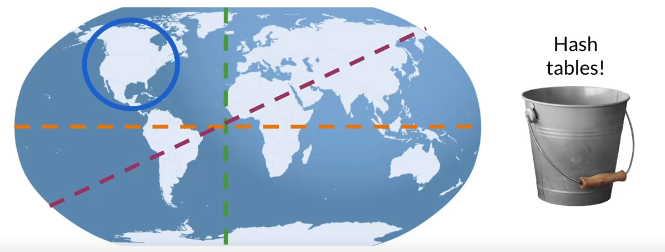

Quando você pensa em organizar subconjuntos de um conjunto de dados de maneira eficiente, pode pensar em colocar seus dados em baldes. Se você pensar em baldes, definitivamente pensará em tabelas hash. Tabelas hash são ferramentas úteis para qualquer tipo de trabalho envolvendo dados.

# Hash tables and hash functions

Imagine que você tem um armário com várias gavetas e deseja colocar objetos semelhantes em gavetas semelhantes: documentos de papel sozinhos, chaves sozinhas e livros sozinhos. Agora, digamos que você tenha vários itens de dados e deseja agrupá-los em compartimentos por algum tipo de similaridade. Um compartimento pode conter mais de um item, e cada item é sempre atribuído ao mesmo compartimento. O resultado seria, por exemplo, que estes ovais azuis terminam no compartimento número 1, estes retângulos cinza terminam no compartimento número 2 e estes triângulos magenta são atribuídos ao compartimento 3.

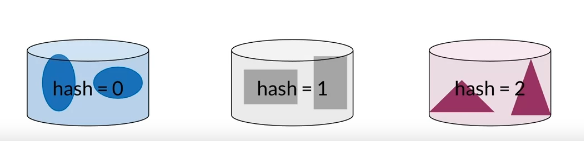

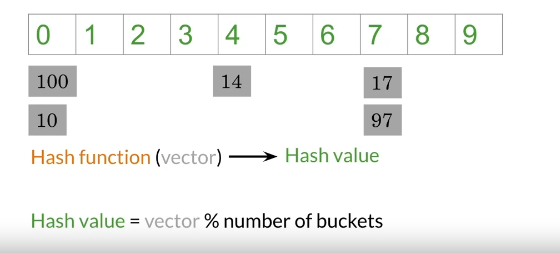

Vamos pensar em como fazer isso com vetores de palavras. Primeiro, vamos supor que os vetores de palavras tenham apenas uma dimensão em vez de 300 dimensões, então cada palavra é representada por um único número, como 100, 14, 17, 10 e 97. Precisamos encontrar uma maneira de dar a cada vetor um valor de hash, que é uma chave que nos diz em qual compartimento ele será atribuído. Uma função que atribui um valor de hash é chamada de função de hash. Neste exemplo, aqui está uma tabela de hash, que é um conjunto de compartimentos. Neste caso, a tabela de hash tem 10 compartimentos. Note como os vetores de palavras 100 e 10 são atribuídos ao compartimento 0. O vetor de palavras 14 é atribuído ao compartimento 4, e os vetores de palavras 17 e 97 são atribuídos ao compartimento 7. Você percebe um padrão? Esta fórmula aqui é a função de hash que está sendo usada para atribuir os vetores de palavras aos seus respectivos compartimentos. O operador módulo pega o resto após a divisão por 10. O resto é o valor de hash que nos diz onde o vetor de palavras deve ser armazenado. Por exemplo, 14 dividido por 10 tem um resto de 4, então vai para o compartimento 4.

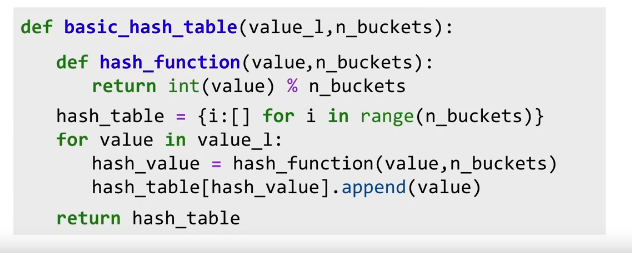

Agora, vamos construir um código básico de hash table. Aqui está uma definição de uma função que recebe uma lista de valores. Você pode pensar em cada valor como um vetor unidimensional. Também recebe o número de compartimentos. Defina a função de hash usada no operador módulo. Então você cria a tabela de hash. Note que esta é uma compreensão de dicionário. A chave é um inteiro e o valor é uma lista vazia que você usará como compartimento para armazenamento. Para cada vetor de palavras, calcule seu valor de hash e, em seguida, adicione-o à lista apropriada.

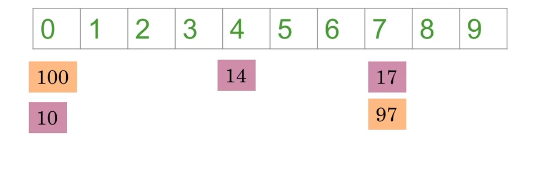

Agora vamos dar outra olhada nesta tabela de hash básica. Lembre-se de que seu objetivo original era colocar vetores de palavras semelhantes no mesmo compartimento. Mas aqui, não parece que números que estão próximos uns dos outros estejam no mesmo compartimento. Por exemplo, 10, 14 e 17 estão em compartimentos diferentes. Idealmente, você deseja ter uma função de hash que coloque vetores de palavras semelhantes nos mesmos compartimentos, como isto. Para fazer isso, você precisará usar o que é chamado de hashing sensível à localidade. Localidade é outra palavra para localização. Sensível é outra palavra para "cuidar". Portanto, hashing sensível à localidade é um método de hashing que se importa muito em atribuir itens com base em onde eles estão localizados no espaço do vetor.

# Locality sensitive hashing

Um método importante que você usará para reduzir o custo computacional de encontrar vizinhos em espaços de alta dimensão é o hashing sensível à localidade (LSH). Para começar a pensar em hashing sensível à localidade, vamos primeiro assumir que você está usando vetores de palavras com apenas duas dimensões. Cada vetor é representado como um círculo ao invés de setas. 

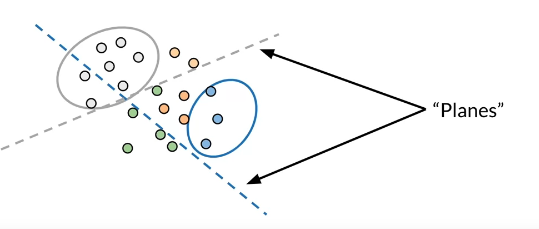

Então, digamos que você queira encontrar uma maneira de saber que esses pontos azuis estão de alguma forma próximos uns dos outros e que esses pontos cinzas também estão relacionados entre si.

Primeiro, divida o espaço usando essas linhas tracejadas, que eu chamarei de planos. Vou explicar por que os chamo de planos em um momento. Observe como o plano azul divide o espaço em vetores que estão acima ou abaixo dele. Os vetores azuis estão todos do mesmo lado do plano azul. Da mesma forma, os vetores cinza estão acima do plano cinza. Parece que os planos podem nos ajudar a agrupar os vetores em subconjuntos com base em sua localização, isso é exatamente o que você quer: uma função de hash que seja sensível à localização dos itens que está atribuindo aos compartimentos.

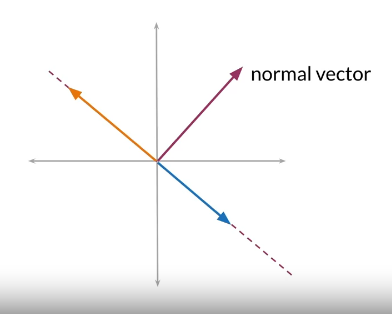

Você está a caminho de entender o hashing sensível à localidade. Agora, vamos ver por que estou chamando essas linhas tracejadas de planos. Um plano seria esta linha magenta no espaço bidimensional e, na verdade, representa todos os possíveis vetores que estariam sentados naquele plano. Em outras palavras, eles seriam paralelos ao plano, como este vetor azul ou este vetor laranja. Você pode definir um plano com um único vetor; este vetor magenta é perpendicular ao plano e é chamado de vetor normal ao plano. O vetor normal é perpendicular a qualquer vetor que esteja no plano. 

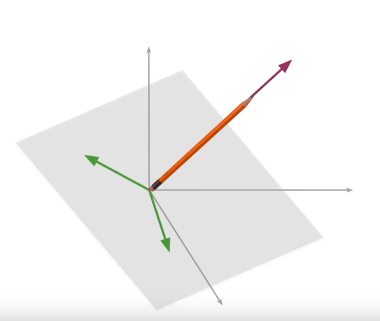

Pode ajudar a pensar nisso em três dimensões: encontre uma folha de papel e um lápis. Coloque o papel na mesa e desenhe alguns vetores nele, depois segure o lápis verticalmente sobre o papel. Quaisquer vetores no papel são perpendiculares ao lápis.

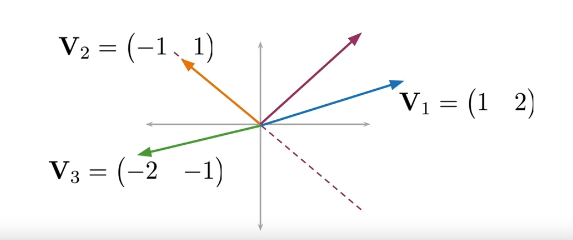

Voltemos às duas dimensões. Você consegue ver visualmente quando o vetor está de um lado do plano ou do outro. Mas como você faz isso matematicamente? Aqui estão três vetores de exemplo em azul, laranja e verde, o vetor normal ao plano é rotulado como P. 

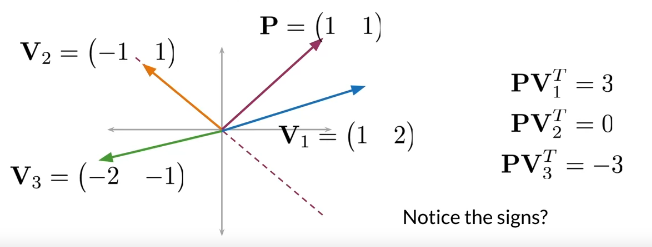

Vamos nos concentrar no vetor um. E se você calcular o produto escalar de P com o vetor um? Você obtém três. Vou explicar em breve por que você está fazendo isso. Agora, vamos olhar para o vetor dois. Se você calcular o produto escalar de P com o vetor dois, você obtém zero. Finalmente, vamos olhar para o vetor três. Se você calcular o produto escalar de P com o vetor três, você obtém menos três.

Ao calcular o produto escalar de um vetor normal P com outro vetor, você está essencialmente medindo a projeção do vetor sobre a direção do vetor normal. Um resultado positivo indica que o vetor está de um lado do plano, um resultado zero indica que o vetor está no plano e um resultado negativo indica que o vetor está do outro lado do plano. Assim, você pode usar o produto escalar para determinar a localização relativa dos vetores em relação ao plano e, dessa forma, agrupar vetores semelhantes no mesmo compartimento usando hashing sensível à localidade.

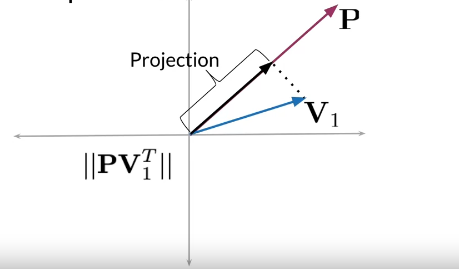

Para visualizar o produto escalar, imagine um dos vetores, como P, como se fosse a superfície da Terra. A gravidade puxa todos os objetos diretamente para baixo em direção à superfície da Terra. Agora, imagine que você está no final do vetor V1. Você amarra uma corda a uma pedra e deixa a gravidade puxar a pedra para a superfície do vetor P, a corda é perpendicular ao vetor P. Agora, se você desenhar um vetor que está na mesma direção de P, o que termina na pedra é o que chamamos de projeção do vetor V1 no vetor P. A magnitude ou comprimento desse vetor é igual ao produto escalar de V1 e P.

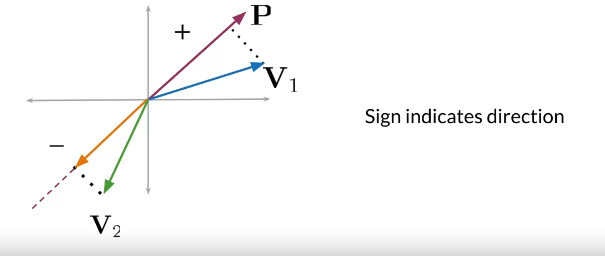

Além disso, se você tivesse este outro vetor verde e o projetasse no vetor P, o vetor projetado estaria apontando na direção paralela, mas oposta a P. O produto escalar seria um número negativo. Isso significa que o sinal do produto escalar indica a direção da projeção em relação ao vetor normal roxo. Então, se o produto escalar é positivo ou negativo, pode dizer se o vetor V1 ou V2 está de um lado do plano ou do outro.

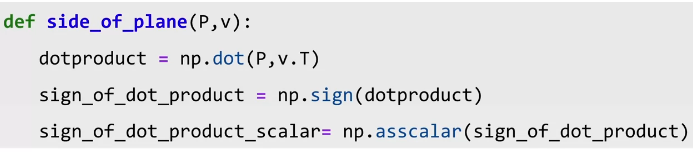

Vamos usar o código para verificar de que lado do plano um vetor está. A função `side_of_plane` recebe o vetor normal P e um vetor V. Use `np.dot` para calcular o produto escalar, use `np.sign` para obter um `+1` se o produto escalar for positivo, `-1` se o produto for negativo ou `0` se o produto escalar for zero. Estou usando `np.asscalar` para pegar o valor escalar. Note a pronúncia dessa função: se um vetor pode ser representado como um único escalar, esta função recupera esse escalar e é isso.

# Multiple Planes

Para dividir seu espaço vetorial em regiões gerenciáveis, você vai querer usar mais de um plano. Para cada plano, você pode descobrir se um vetor está do lado positivo ou negativo daquele plano. Você obterá vários sinais, um para cada plano, e você vai querer encontrar uma maneira de combinar todos esses sinais em um único valor de hash. Esse valor de hash definirá uma região particular dentro do espaço vetorial.

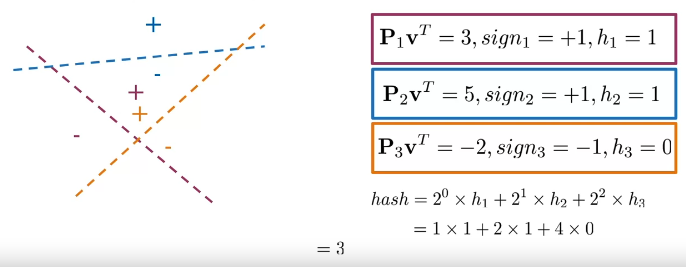

Vamos passar por um exemplo e então você verá a fórmula geral para combinar sinais de múltiplos planos. Para um vetor único, digamos que seu produto escalar com o Plano 1 é três, então o sinal é positivo e o valor de hash é definido como um para indicar que o sinal é positivo. Para o segundo plano, o produto escalar é cinco. O sinal é novamente positivo e o valor de hash é um. Para o terceiro plano, o produto escalar é negativo dois. O sinal é negativo e o valor de hash é definido como zero para indicar que o vetor está do lado negativo do Plano 3.

Para combinar esses valores de hash intermediários em um único valor de hash, você fará o seguinte: pegue 2^0 vezes h_1 mais 2^1 vezes h_2 mais 2^2 vezes h_3. Isso nos dá um valor de hash combinado de três. Só para relembrar, você tem vários planos e isso nos ajuda a dividir o espaço vetorial em sub-regiões menores. Mas você quer ter um único valor de hash para saber em qual bucket atribuir o vetor. Você faz isso combinando os sinais de todos os planos em um único valor de hash.

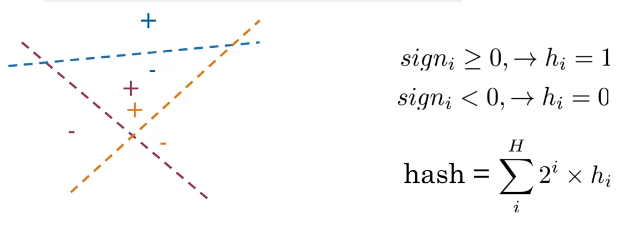

Aqui estão as regras que você aplicou escritas: Se o sinal do produto escalar for maior ou igual a zero, atribua o valor de hash intermediário de um. Caso contrário, se o produto escalar for menor que zero, atribua o valor de hash intermediário de zero. Para combinar os valores de hash intermediários, use esta fórmula. Isso é o que você obtém com a hash sensível à localidade.

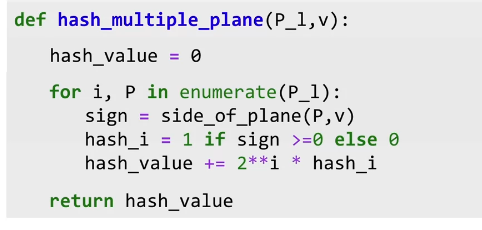

Vamos implementar isso em código. Dada uma lista de planos e um vetor, comece com um valor de hash de zero, que você usará para acumular a soma dos valores de hash intermediários. Em seguida, para cada plano, você quer calcular o sinal do produto escalar. Defina o valor de hash intermediário como um se o sinal for maior ou igual a zero, caso contrário, defina-o como zero. Depois, você multiplica o valor de hash intermediário por dois elevado à potência de i e adiciona-o ao valor de hash. Finalmente, você retorna o valor de hash.

# Hash tables

## Funções de Hash e Multiplanos

Vamos praticar os conceitos mais importantes relacionados às funções de hash.

Um ponto chave para a busca usando funções de hash é o cálculo da chave de hash ou ID do bucket que atribuímos para uma determinada entrada.

* Tabelas de hash básicas
* Multiplanos
* Planos aleatórios

## Tabelas de Hash Básicas

Tabelas de hash são estruturas de dados que permitem indexar dados para tornar as tarefas de busca mais eficientes.

In [50]:
import numpy as np                # biblioteca para manipulação de arrays e matrizes
import pprint                     # utilidades para impressão no console
import matplotlib.pyplot as plt   # biblioteca de visualização

pp = pprint.PrettyPrinter(indent=4) # Instanciar um pretty printer


Na próxima célula, vamos definir uma função de hash simples para números inteiros. A função receberá uma lista de números inteiros e a quantidade desejada de buckets. A função produzirá uma tabela de hash armazenada como um dicionário, onde as chaves conterão as chaves de hash, e os valores fornecerão os elementos hashed da lista de entrada.

A função de hash é apenas o resto da divisão inteira entre cada elemento e a quantidade desejada de buckets.

In [51]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # Inicializa todos os buckets na tabela de hash como listas vazias

    for value in value_l:
        hash_value = hash_function(value, n_buckets) # Obtém a chave de hash para o valor dado
        hash_table[hash_value].append(value) # Adiciona o elemento ao bucket correspondente
    
    return hash_table

# Agora vamos ver a função de tabela de hash em ação. A função pprint() produzirá uma saída visualmente atraente.

value_l = [100, 10, 14, 17, 97] # Conjunto de valores para hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


Neste caso, a chave do bucket deve ser o dígito mais à direita de cada número.

## Planos

Funções de hash multiplanos são outro tipo de funções de hash. Funções de hash multiplanos são baseadas na ideia de numerar cada região que é formada pela interseção de n planos. No código a seguir, mostramos as formas mais básicas do princípio dos multiplanos. Primeiro, com um único plano:


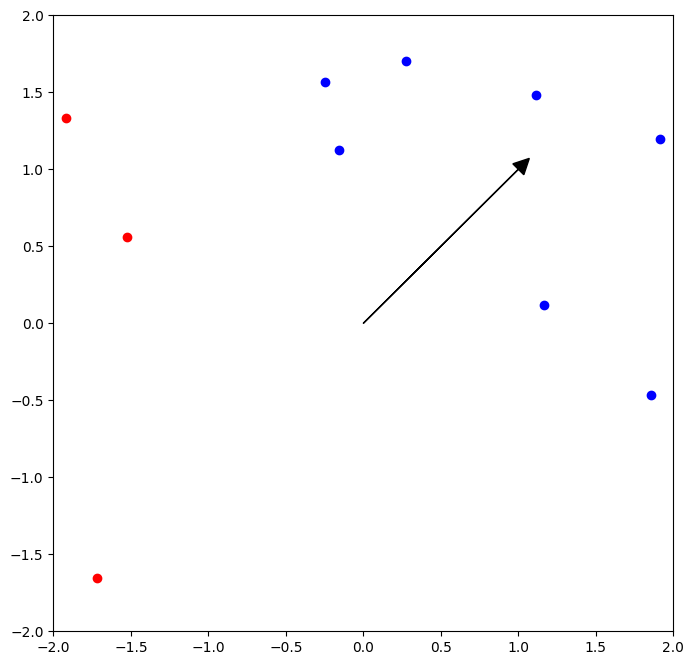

In [52]:
P = np.array([[1, 1]]) # Define um único plano.
fig, ax1 = plt.subplots(figsize=(8, 8)) # Cria um gráfico

plot_vectors([P], axes=[2, 2], ax=ax1) # Plota o plano P como um vetor

# Plota pontos aleatórios.
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Obtém um par de números aleatórios entre -2 e 2
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
        # Colore os pontos dependendo do sinal do resultado de np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plota pontos azuis
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plota pontos vermelhos

plt.show()

A primeira coisa a notar é que o vetor que define o plano não marca a fronteira entre os dois lados do plano. Ele marca a direção em que você encontra o lado 'positivo' do plano. Não é intuitivo!

Se quisermos plotar o plano de separação, precisamos plotar uma linha que seja perpendicular ao nosso vetor `P`. Podemos obter tal linha usando uma matriz de rotação de $90^o$.

Sinta-se à vontade para mudar a direção do plano `P`.

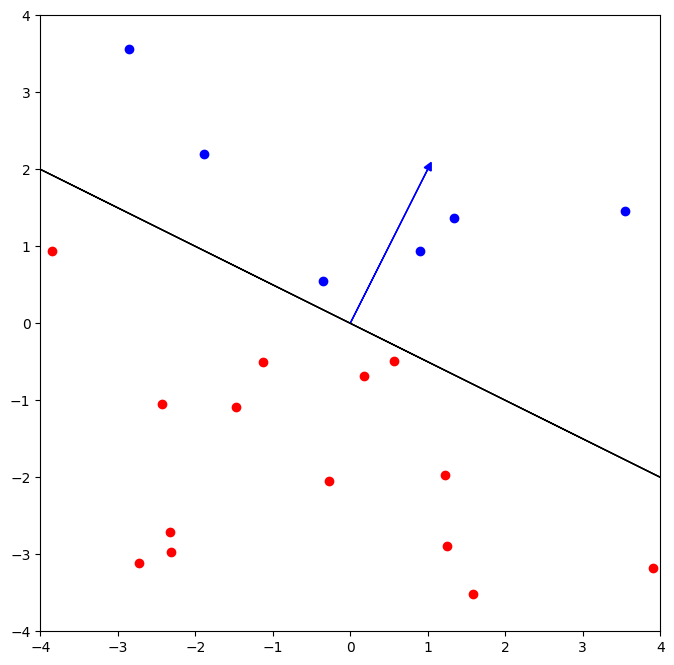

In [53]:
P = np.array([[1, 2]])  # Define um único plano. Você pode mudar a direção

# Obtenha um novo plano perpendicular a P. Usamos uma matriz de rotação
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Cria um gráfico com tamanho personalizado

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plota o plano P como um vetor

# Plota o plano P como 2 vetores.
# Nós escalamos por 2 apenas para obter as setas fora da caixa atual
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plota 20 pontos aleatórios.
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Obtém um par de números aleatórios entre -4 e 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Obtém o sinal do produto escalar com P
        # Colore os pontos dependendo do sinal do resultado de np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plota um ponto azul
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plota um ponto vermelho

plt.show()

Agora, vamos ver o que está dentro do código que colore os pontos.

In [54]:
P = np.array([[1, 1]])      # Plano único
v1 = np.array([[1, 2]])     # Ponto de exemplo 1
v2 = np.array([[-1, 1]])    # Ponto de exemplo 2
v3 = np.array([[-2, -1]])   # Ponto de exemplo 3

In [55]:
def side_of_plane(P, v):
    return np.sign(np.dot(P, v.T))

print(side_of_plane(P, v1)) # Deve retornar 1
print(side_of_plane(P, v2)) # Deve retornar 1
print(side_of_plane(P, v3)) # Deve retornar -1

[[1]]
[[0]]
[[-1]]


In [56]:
np.dot(P, v1.T)

array([[3]])

In [57]:
np.dot(P, v2.T)

array([[0]])

In [58]:
np.dot(P, v3.T)

array([[-3]])

A função abaixo verifica de qual lado do plano `P` está localizado o vetor `v`.

In [59]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Obtém o produto escalar P * v'
    sign_of_dot_product = np.sign(dotproduct) # O sinal dos elementos da matriz de produto escalar
    sign_of_dot_product_scalar = sign_of_dot_product.item() # O valor do primeiro item
    return sign_of_dot_product_scalar

In [60]:
side_of_plane(P, v1) # Onde cada lado está [1,2]

1

In [61]:
side_of_plane(P, v2) # Onde cada lado está [-1, 1]

0

In [62]:
side_of_plane(P, v3) # Onde cada lado está [-2, -1]

-1


## Função de Hash com múltiplos planos

Na próxima seção, vamos definir uma função de hash com uma lista de três planos personalizados em 2D.


In [63]:
P1 = np.array([[1, 1]])   # Primeiro plano 2D
P2 = np.array([[-1, 1]])  # Segundo plano 2D
P3 = np.array([[-1, -1]]) # Terceiro plano 2D
P_l = [P1, P2, P3]  # Lista de arrays. É o multi plano

# Vetor para busca
v = np.array([[2, 2]])


A próxima função cria um valor de hash com base em um conjunto de planos. O valor de saída é uma combinação do lado do plano onde o vetor está localizado em relação à coleção de planos.

Podemos pe

In [64]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [65]:
hash_multi_plane(P_l, v)

3

## Planos Aleatórios

No trecho de código abaixo, criamos um conjunto de três planos aleatórios:


In [66]:
np.random.seed(0)
num_dimensions = 2 # é 300 na tarefa
num_planes = 3 # é 10 na tarefa
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

v = np.array([[2, 2]])

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


A próxima função é semelhante à função `side_of_plane()`, mas ela avalia mais de um plano de cada vez. O resultado é uma matriz com os lados do plano de `v`, para o conjunto de planos `P`.

In [67]:
# Função do lado do plano. O resultado é uma matriz
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Obtém um valor booleano informando se o valor na célula é positivo ou negativo
    return sign_of_dot_product

Obtendo o lado do plano do vetor `[2, 2]` para o conjunto de planos aleatórios:

In [68]:
sides_l = side_of_plane_matrix(random_planes_matrix, v)
print(sides_l)

[[1.]
 [1.]
 [1.]]


Agora, vamos usar a função anterior para definir nossa função de hash com múltiplos planos:

In [69]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Obtém o lado dos planos para P e v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Obtém o valor dentro da célula da matriz
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i # soma 2^i * hash_i
        
    return hash_value

Imprime o hash bucket para o vetor `v = [2, 2]`.

In [70]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

#### Nota
Isto mostrou como criar um conjunto de planos aleatórios. Você fará múltiplos conjuntos de planos aleatórios para tornar os vizinhos aproximados mais precisos.

## Vetores de Documentos

Antes de terminarmos este laboratório, lembre-se de que você pode representar um documento como um vetor somando os vetores das palavras contidas no documento. Neste exemplo, nossa incorporação contém apenas três palavras, cada uma representada por um array 3D.


In [71]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word, 0)
    
print(document_embedding)

[1 0 3]



Neste código, o documento é representado como a soma dos vetores das palavras contidas nele. Se uma palavra não estiver no dicionário de embeddings (`word_embedding`), o valor padrão `0` será usado.

# Approximate nearest neighbors

Você aprendeu sobre hashing sensível à localidade, agora é hora de colocar todo esse conhecimento em uso. Vamos vai criar um algoritmo que calcula os k vizinhos mais próximos de forma muito mais rápida do que a busca exaustiva. 

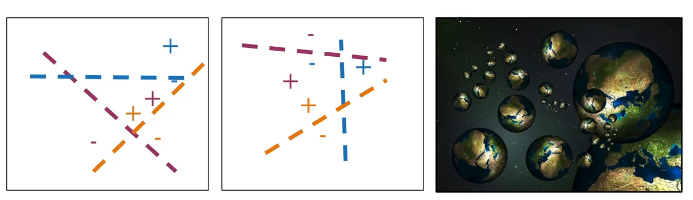

Vimos que alguns planos, como estes três, podem dividir o espaço vetorial em regiões. Mas será que esses planos são a melhor maneira de dividir o espaço vetorial? E se, em vez disso, você dividisse o espaço vetorial igual na figura 2? Na verdade, você não pode saber com certeza quais conjuntos de planos são a melhor maneira de dividir o espaço vetorial. Então, por que não criar vários conjuntos de planos aleatórios? Dessa forma, você pode dividir o espaço vetorial em vários conjuntos independentes de tabelas hash. Você pode pensar nisso como criar várias cópias do universo ou um multiverso, se preferir. Você pode usar todos esses diferentes conjuntos de planos aleatórios para ajudar a encontrar um bom conjunto de vetores vizinhos amigáveis. Quero dizer, um conjunto de k vizinhos mais próximos.

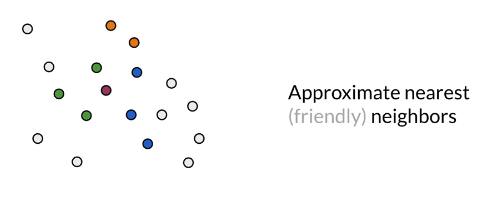

Voltando aos nossos múltiplos conjuntos de planos aleatórios, aqui, por exemplo, vamos supor que você tenha um espaço vetorial. E esse ponto magenta no meio representa a transformação de uma palavra em inglês para um vetor de palavra em francês. Você está tentando encontrar outros vetores de palavras em francês que possam ser semelhantes, então talvez um universo de planos aleatórios nos ajude a determinar que esse vetor magenta e esses vetores verdes são todos atribuídos aos mesmos compartimentos hash. Outro conjunto completamente diferente de planos aleatórios nos ajudou a determinar que esses vetores azuis estão nos mesmos compartimentos hash que o vetor vermelho. Um terceiro conjunto de planos aleatórios nos ajudou a determinar que esses vetores laranja estão nos mesmos compartimentos hash que o vetor magenta.

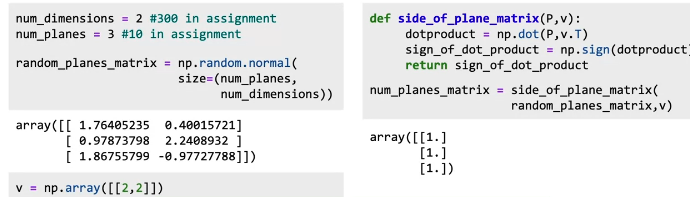

Usando múltiplos conjuntos de planos aleatórios para hashing sensível à localidade, você tem uma maneira mais robusta de pesquisar no espaço vetorial um conjunto de vetores que são possíveis candidatos a serem os vizinhos mais próximos. Isso é chamado de vizinhos mais próximos aproximados, porque você não está pesquisando o espaço vetorial inteiro, mas apenas um subconjunto dele. Portanto, não são os k vizinhos mais próximos absolutos, mas são aproximadamente os k vizinhos mais próximos. Você sacrifica um pouco de precisão para ganhar eficiência na sua busca, então vamos ver como fazer um conjunto de planos aleatórios em código. Supondo que seus vetores de palavras tenham duas dimensões e você queira gerar três planos aleatórios. Você usará `np.random.normal` para gerar uma matriz de três linhas e duas colunas. Como você pode ver, você criará um vetor v e, para cada plano aleatório, verá de que lado do plano o vetor está. Assim, você descobrirá se o vetor v está no lado positivo ou negativo de cada um desses três planos. Observe que, em vez de usar um laço for para trabalhar com um plano de cada vez, você pode usar `np.dot` para fazer isso em um passo. Vamos chamar a função, o resultado é que o vetor v está no lado positivo de cada um dos três planos aleatórios.

# Searching documents

Como você pode usar a busca rápida dos k-vizinhos mais próximos para pesquisar trechos de texto relacionados a uma consulta em uma grande coleção de documentos. Você simplesmente cria vetores para ambos e encontra os vizinhos mais próximos.

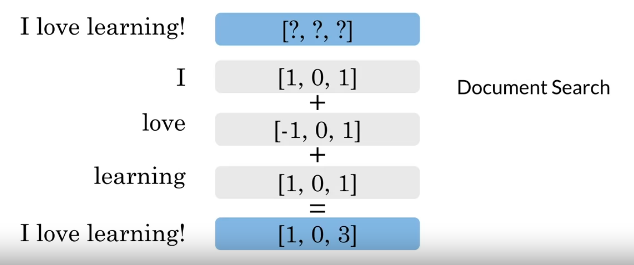

Para se preparar para realizar a busca de documentos, primeiro, pense em como representar documentos como vetores em vez de apenas palavras como vetores. Digamos que você tenha esses documentos compostos por três palavras: Eu amo aprender. Como você pode representar todo este documento como um vetor? 

Bem, você pode encontrar os vetores de palavras para cada palavra individual: Eu, amo, aprender e, em seguida, apenas somá-los. Assim, a soma de todos esses vetores de palavras se torna um vetor de documento com a mesma dimensão que os vetores de palavras. Neste caso, três dimensões. Você pode então aplicar a busca de documentos usando k-vizinhos mais próximos.

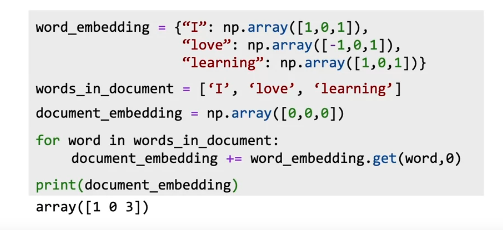

Vamos fazer isso, criando um mini dicionário para as incorporações de palavras. Aqui está a lista de palavras contidas no documento. Você vai inicializar a incorporação do documento como uma matriz de zeros. Agora, para cada palavra em um documento, você obterá o vetor da palavra se a palavra existir no dicionário, caso contrário, zero. Você soma tudo isso e retorna a incorporação do documento.

# Naive Machine Translation and LSH

## Tradução Automática Ingênua e LSH

Vamos implementar um sistema de tradução automática e ver como funciona o hashing sensível à localidade.

In [78]:
import pdb
import pickle
import string
import time
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords, twitter_samples
from os import getcwd

In [74]:
# adicionar pasta, tmp2, do nosso espaço de trabalho local contendo arquivos de corpora pré-baixados ao caminho de dados do nltk
filePath = f"{getcwd()}/tmp2/"
nltk.data.path.append(filePath)

## Os Dados de Embeddings de Palavras para Palavras em Inglês e Francês

Vamos criar um programa que traduza do inglês para o francês. Usaremos um subconjunto de embeddings de palavras.

In [89]:
en_embeddings_subset = pickle.load(open("en_embeddings.p", "rb"))
fr_embeddings_subset = pickle.load(open("fr_embeddings.p", "rb"))

#### Olhando os dados

* en_embeddings_subset: a chave é uma palavra em inglês, e o valor é um array de 300 dimensões, que é o embedding para essa palavra.
```
'the': array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281, ....
```

* fr_embeddings_subset: a chave é uma palavra em francês, e o valor é um array de 300 dimensões, que é o embedding para essa palavra.
```
'la': array([-6.18250e-03, -9.43867e-04, -8.82648e-03,  3.24623e-02,...

#### Carregar dois dicionários que mapeiam palavras do inglês para o francês
* Um dicionário de treinamento
* e um dicionário de teste.

In [90]:
def get_dict(file_name):
    """
    Esta função retorna o dicionário de inglês para francês dado um arquivo onde cada coluna corresponde a uma palavra.
    Verifique os arquivos que esta função utiliza no seu espaço de trabalho.
    """
    my_file = pd.read_csv(file_name, delimiter=' ')
    etof = {}  # o dicionário de inglês para francês a ser retornado
    for i in range(len(my_file)):
        # indexando nas linhas.
        en = my_file.loc[i][0]
        fr = my_file.loc[i][1]
        etof[en] = fr

    return etof

In [91]:
# carregando os dicionários de inglês para francês
en_fr_train = get_dict('en-fr.train.txt')
print('O tamanho do dicionário de treinamento de inglês para francês é', len(en_fr_train))
en_fr_test = get_dict('en-fr.test.txt')
print('O tamanho do dicionário de teste de inglês para francês é', len(en_fr_test))

O tamanho do dicionário de treinamento de inglês para francês é 5000
O tamanho do dicionário de teste de inglês para francês é 1500



#### Olhando o dicionário inglês-francês

* `en_fr_train` é um dicionário onde a chave é a palavra em inglês e o valor é a tradução em francês dessa palavra em inglês.
```
{'the': 'la',
 'and': 'et',
 'was': 'était',
 'for': 'pour',
```

* `en_fr_test` é similar a `en_fr_train`, mas é um conjunto de teste. Não olharemos para ele até chegarmos aos testes.

### Gerar Matrizes de Embeddings e Transformação


### get_matrices

Traduzindo dicionário de inglês para francês usando embeddings.

Agora vamos implementar uma função `get_matrices`, que recebe os dados carregados e retorna as matrizes `X` e `Y`.

Entradas:
- `en_fr` : Dicionário de inglês para francês
- `en_embeddings` : Dicionário de embeddings em inglês
- `fr_embeddings` : Dicionário de embeddings em francês

Retorna:
- Matriz `X` e matriz `Y`, onde cada linha em X é o embedding de uma palavra em inglês, e a mesma linha em Y é o embedding da versão francesa dessa palavra em inglês.

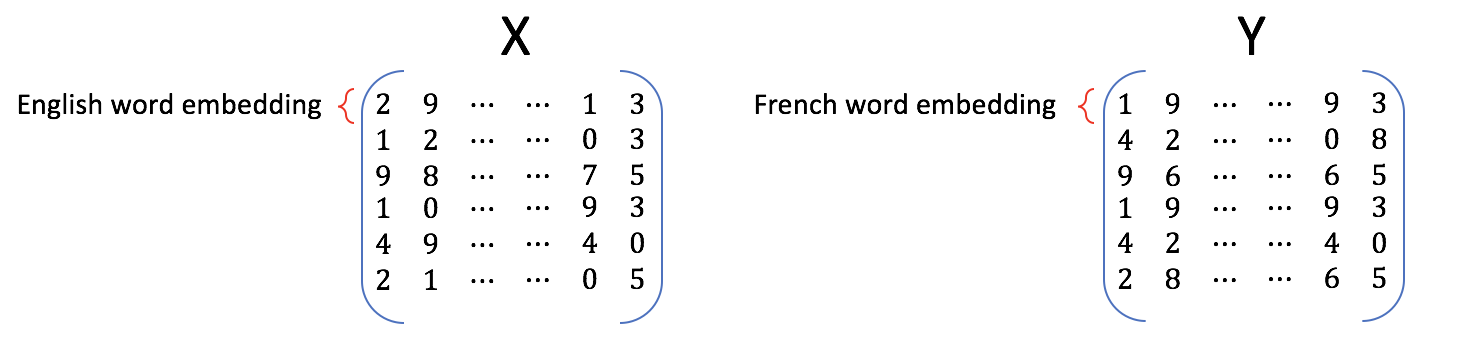


In [92]:
def get_matrices(en_fr, french_vecs, english_vecs):
    """
    Cria matrizes de embeddings de palavras para palavras em inglês e francês que são mapeadas umas às outras.
    
    Entradas:
        en_fr: Dicionário mapeando palavras em inglês para palavras em francês.
        french_vecs: Dicionário de embeddings de palavras em francês.
        english_vecs: Dicionário de embeddings de palavras em inglês.
    
    Saídas: 
        X: Matriz com cada linha sendo o embedding de uma palavra em inglês. A forma é (number_of_words, embedding_size).
        Y: Matriz com cada linha sendo o embedding da palavra francesa correspondente. A forma é igual a X.
    
    Nota:
        Esta função não computa ou retorna uma matriz de projeção.
    """

    # X_l e Y_l são listas dos embeddings de palavras em inglês e francês
    X_l = list()
    Y_l = list()

    # loop através de todos os pares de palavras em inglês e francês no dicionário inglês-francês
    for en_word, fr_word in en_fr.items():

        # verifica se a palavra francesa tem um embedding e se a palavra inglesa tem um embedding
        if fr_word in french_vecs and en_word in english_vecs:

            # obtém o embedding em inglês
            en_vec = english_vecs[en_word]

            # obtém o embedding em francês
            fr_vec = french_vecs[fr_word]

            # adiciona o embedding em inglês à lista
            X_l.append(en_vec)

            # adiciona o embedding em francês à lista
            Y_l.append(fr_vec)

    # empilha os vetores de X_l em uma matriz X
    X = np.stack(X_l)

    # empilha os vetores de Y_l em uma matriz Y
    Y = np.stack(Y_l)
    
    return X, Y

Agora usaremos a função `get_matrices()` para obter os conjuntos `X_train` e `Y_train` de embeddings de palavras em inglês e francês nos correspondentes modelos de espaço vetorial.

In [93]:
# obtendo o conjunto de treinamento:
X_train, Y_train = get_matrices(
    en_fr_train, fr_embeddings_subset, en_embeddings_subset)

## Traduções

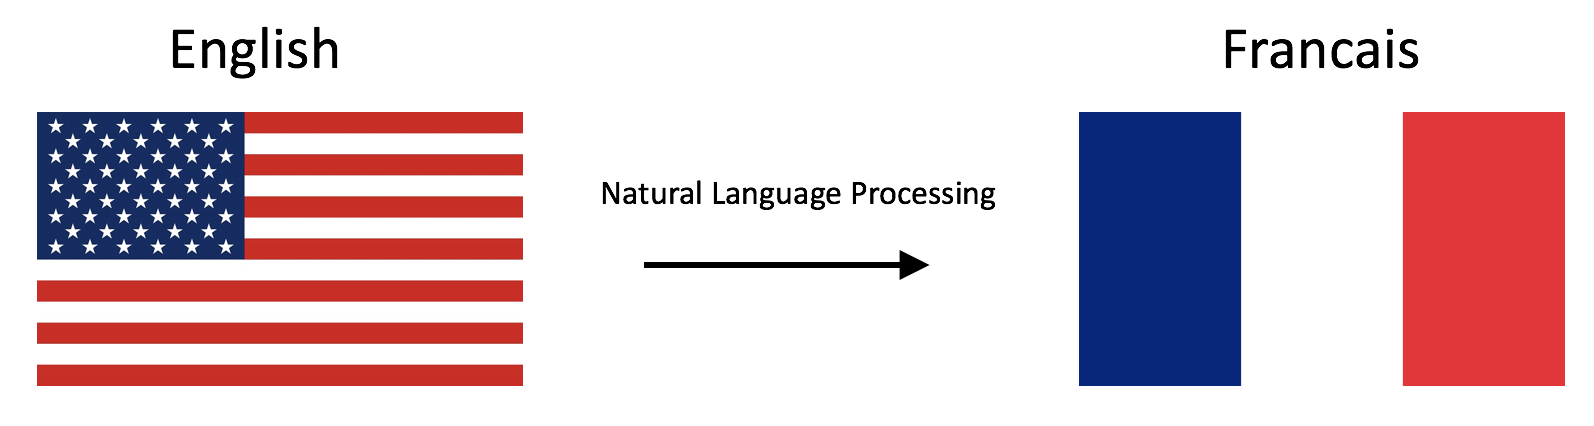


### Tradução como Transformação Linear de Embeddings

Dado dicionários de embeddings de palavras em inglês e francês, você criará uma matriz de transformação `R`.
* Dado um embedding de palavra em inglês, $\mathbf{e}$, você pode multiplicar $\mathbf{eR}$ para obter um novo embedding de palavra $\mathbf{f}$.
    * Tanto $\mathbf{e}$ quanto $\mathbf{f}$ são [vetores linha](https://en.wikipedia.org/wiki/Row_and_column_vectors).
* Você pode então calcular os vizinhos mais próximos de `f` nos embeddings em francês e recomendar a palavra que é mais similar ao embedding transformado.

#### Descrevendo a tradução como um problema de minimização

Encontre uma matriz `R` que minimize a seguinte equação.

$$\arg \min _{\mathbf{R}}\| \mathbf{X R} - \mathbf{Y}\|_{F}\tag{1} $$

#### Norma de Frobenius

A norma de Frobenius de uma matriz $A$ (assumindo que é de dimensão $m,n$) é definida como a raiz quadrada da soma dos quadrados absolutos de seus elementos:

$$\|\mathbf{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}\tag{2}$$

#### Função de perda real
Em aplicações do mundo real, a perda da norma de Frobenius:

$$\| \mathbf{XR} - \mathbf{Y}\|_{F}$$

é frequentemente substituída pelo seu valor ao quadrado dividido por $m$:

$$ \frac{1}{m} \|  \mathbf{X R} - \mathbf{Y} \|_{F}^{2}$$

onde $m$ é o número de exemplos (linhas em $\mathbf{X}$).

* A mesma matriz `R` é encontrada ao usar esta função de perda versus a norma de Frobenius original.
* A razão para tomar o quadrado é que é mais fácil calcular o gradiente da norma de Frobenius ao quadrado.
* A razão para dividir por $m$ é que estamos mais interessados na perda média por embedding do que na perda para todo o conjunto de treinamento.
    * A perda para todo o conjunto de treinamento aumenta com mais palavras (exemplos de treinamento), 
    então tomar a média nos ajuda a acompanhar a perda média independentemente do tamanho do conjunto de treinamento.

#### Implementando o mecanismo de tradução descrito nesta seção.


### compute_loss

#### Calculando a perda
* A função de perda será a norma de Frobenius ao quadrado da diferença entre a matriz e sua aproximação, dividida pelo número de exemplos de treinamento $m$.
* Sua fórmula é:
$$ L(X, Y, R)=\frac{1}{m}\sum_{i=1}^{m} \sum_{j=1}^{n}\left( a_{i j} \right)^{2}$$

onde $a_{i j}$ é o valor na linha $i$ e coluna $j$ da matriz $\mathbf{XR}-\mathbf{Y}$.

In [94]:
def compute_loss(X, Y, R):
    '''
    Entradas: 
        X: uma matriz de dimensão (m,n) onde as colunas são os embeddings em inglês.
        Y: uma matriz de dimensão (m,n) onde as colunas correspondem aos embeddings em francês.
        R: uma matriz de dimensão (n,n) - matriz de transformação do espaço vetorial de embeddings em inglês para francês.
    Saídas:
        L: uma matriz de dimensão (m,n) - o valor da função de perda para os dados X, Y e R.
    '''
 
    # m é o número de linhas em X
    m = len(X)
        
    # diff é XR - Y    
    diff = np.dot(X, R) - Y

    # diff_squared é o quadrado elemento a elemento da diferença    
    diff_squared = np.square(diff)

    # sum_diff_squared é a soma dos elementos ao quadrado
    sum_diff_squared = np.sum(diff_squared)

    # loss é a sum_diff_squared dividida pelo número de exemplos (m)
    loss = sum_diff_squared / m

    return loss

### compute_gradient

#### Calculando o gradiente da perda em relação à matriz de transformação R

* Calcule o gradiente da perda em relação à matriz de transformação `R`.
* O gradiente é uma matriz que codifica quanto uma pequena mudança em `R` afeta a mudança na função de perda.
* O gradiente nos dá a direção na qual devemos diminuir `R` para minimizar a perda.
* `m` é o número de exemplos de treinamento (número de linhas em `X`).
* A fórmula para o gradiente da função de perda $𝐿(𝑋,𝑌,𝑅)$ é:

$$\frac{d}{dR}𝐿(𝑋,𝑌,𝑅)=\frac{d}{dR}\Big(\frac{1}{m}\| X R -Y\|_{F}^{2}\Big) = \frac{2}{m}X^{T} (X R - Y)$$

In [95]:
def compute_gradient(X, Y, R):
    '''
    Entradas: 
        X: uma matriz de dimensão (m,n) onde as colunas são os embeddings em inglês.
        Y: uma matriz de dimensão (m,n) onde as colunas correspondem aos embeddings em francês.
        R: uma matriz de dimensão (n,n) - matriz de transformação dos embeddings do espaço vetorial em inglês para francês.
    Saídas:
        g: um valor escalar - gradiente da função de perda L para os dados X, Y e R.
    '''
    # m é o número de linhas em X
    m = len(X)

    # gradiente é X^T(XR - Y) * 2/m    
    gradient = X.T @ (np.dot(X,R) - Y) * (2/m)
    
    return gradient

#### Encontrando o R ótimo com o Algoritmo de Descida do Gradiente

##### Descida do Gradiente

[Descida do gradiente](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) é um algoritmo iterativo usado na busca do ótimo da função.
* Anteriormente, mencionamos que o gradiente da perda em relação à matriz codifica quanto uma pequena mudança em alguma coordenada dessa matriz afeta a mudança da função de perda.
* A descida do gradiente usa essa informação para mudar iterativamente a matriz `R` até atingirmos um ponto onde a perda é minimizada.

Para implementar o algoritmo de descida do gradiente para alinhar os embeddings, você vai seguir esses passos:

1. Calcule o gradiente da perda em relação à matriz $R$.
2. Atualize $R$ com a fórmula:
$$R_{\text{new}}= R_{\text{old}}-\alpha g$$

Onde $\alpha$ é a taxa de aprendizado, que é um escalar.

Vamos implementar a função `align_embeddings`:

In [96]:
def align_embeddings(X, Y, train_steps=100, learning_rate=0.0003, verbose=True, compute_loss=compute_loss, compute_gradient=compute_gradient):
    '''
    Entradas:
        X: uma matriz de dimensão (m,n) onde as colunas são os embeddings em inglês.
        Y: uma matriz de dimensão (m,n) onde as colunas correspondem aos embeddings em francês.
        train_steps: int positivo - descreve quantos passos o algoritmo de descida do gradiente fará.
        learning_rate: float positivo - descreve quão grandes serão os passos do algoritmo de descida do gradiente.
    Saídas:
        R: uma matriz de dimensão (n,n) - a matriz de projeção que minimiza a norma F ||X R -Y||^2
    '''
    np.random.seed(129)

    # o número de colunas em X é o número de dimensões para um vetor de palavras (por exemplo, 300)
    # R é uma matriz quadrada com comprimento igual ao número de dimensões no embedding de palavras
    R = np.random.rand(X.shape[1], X.shape[1])

    for i in range(train_steps):
        if verbose and i % 25 == 0:
            print(f"loss at iteration {i} is: {compute_loss(X, Y, R):.4f}")

        # use a função que você definiu para calcular o gradiente
        gradient = compute_gradient(X, Y, R)

        # atualize R subtraindo a taxa de aprendizado vezes o gradiente
        R -= learning_rate * gradient

    return R

#### Calcular a Matriz de Transformação \( \mathbf{R} \)

Usando apenas o conjunto de treinamento, encontre a matriz de transformação \( \mathbf{R} \) chamando a função `align_embeddings()`.

In [97]:
R_train = align_embeddings(X_train, Y_train, train_steps=400, learning_rate=0.8)

loss at iteration 0 is: 963.0146
loss at iteration 25 is: 97.8292
loss at iteration 50 is: 26.8329
loss at iteration 75 is: 9.7893
loss at iteration 100 is: 4.3776
loss at iteration 125 is: 2.3281
loss at iteration 150 is: 1.4480
loss at iteration 175 is: 1.0338
loss at iteration 200 is: 0.8251
loss at iteration 225 is: 0.7145
loss at iteration 250 is: 0.6534
loss at iteration 275 is: 0.6185
loss at iteration 300 is: 0.5981
loss at iteration 325 is: 0.5858
loss at iteration 350 is: 0.5782
loss at iteration 375 is: 0.5735


### Testando a Tradução

#### Algoritmo k-Nearest Neighbors

O [algoritmo k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) 
* O k-NN é um método que recebe um vetor como entrada e encontra os outros vetores no conjunto de dados que são mais próximos dele.
* O 'k' é o número de "vizinhos mais próximos" a serem encontrados (por exemplo, k=2 encontra os dois vizinhos mais próximos).

#### Buscando o Embedding da Tradução
Como estamos aproximando a função de tradução de embeddings do inglês para o francês por meio de uma matriz de transformação linear $ \mathbf{R} $, na maioria das vezes não obteremos o embedding exato de uma palavra em francês ao transformar o embedding $ \mathbf{e} $ de alguma palavra em inglês particular para o espaço de embeddings em francês.
* É aqui que o k-NN se torna muito útil! Ao usar o 1-NN com $ \mathbf{eR} $ como entrada, podemos buscar um embedding $ \mathbf{f} $ (como uma linha) na matriz $ \mathbf{Y} $ que é o mais próximo do vetor transformado $ \mathbf{eR} $.

#### Similaridade Cosseno
A similaridade cosseno entre vetores $ u $ e $ v $ é calculada como o cosseno do ângulo entre eles.
A fórmula é

$$\cos(u,v)=\frac{u \cdot v}{\left\|u\right\| \left\|v\right\|}$$

* $ \cos(u,v) = 1 $ quando $ u $ e $ v $ estão na mesma linha e têm a mesma direção.
* $ \cos(u,v) = -1 $ quando têm direções exatamente opostas.
* $ \cos(u,v) = 0 $ quando os vetores são ortogonais (perpendiculares) entre si.

#### Nota: Distância e similaridade são praticamente opostos.
* Podemos obter uma métrica de distância a partir da similaridade cosseno, mas a similaridade cosseno não pode ser usada diretamente como a métrica de distância.
* Quando a similaridade cosseno aumenta (em direção a 1), a "distância" entre os dois vetores diminui (em direção a 0).
* Podemos definir a distância cosseno entre $ u $ e $ v $ como
$$d_{\text{cos}}(u,v)=1-\cos(u,v)$$

### nearest_neighbor

função `nearest_neighbor()`

Entradas:
* Vetor `v`,
* Um conjunto de possíveis vizinhos mais próximos `candidates`
* `k` vizinhos mais próximos a encontrar.
* A métrica de distância deve ser baseada na similaridade cosseno.
* Itere sobre as linhas em `candidates`, e salve o resultado das similaridades entre a linha atual e o vetor `v` em uma lista Python. Certifique-se de que as similaridades estejam na mesma ordem que os vetores de linha dos `candidates`.
* Agora você pode usar [numpy argsort]( https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html#numpy.argsort) para classificar os índices das linhas dos `candidates`.

In [99]:
def cosine_similarity(A, B):
    '''
    Entrada:
        A: um array numpy que corresponde a um vetor de palavra
        B: um array numpy que corresponde a um vetor de palavra
    Saída:
        cos: número numérico representando a similaridade cosseno entre A e B.
    '''
    # você deve definir esta variável para o valor verdadeiro.
    cos = -10    
    dot = np.dot(A, B)
    normb = np.linalg.norm(B)
    
    if len(A.shape) == 1: # Se A é apenas um vetor, obtemos a norma
        norma = np.linalg.norm(A)
        cos = dot / (norma * normb)
    else: # Se A é uma matriz, então calculamos as normas dos vetores de palavras da matriz (norma de cada linha)
        norma = np.linalg.norm(A, axis=1)
        epsilon = 1.0e-9 # para evitar divisão por 0
        cos = dot / (norma * normb + epsilon)
        
    return cos

In [100]:
def nearest_neighbor(v, candidates, k=1, cosine_similarity=cosine_similarity):
    """
    Entrada:
      - v: o vetor para o qual você está procurando o vizinho mais próximo
      - candidates: um conjunto de vetores onde encontraremos os vizinhos
      - k: top k vizinhos mais próximos a encontrar
    Saída:
      - k_idx: os índices dos k vetores mais próximos classificados
    """

    similarity_l = []

    # para cada vetor candidato...
    for row in candidates:
        # obter a similaridade cosseno
        cos_similarity = cosine_similarity(v, row)

        # adicionar a similaridade à lista
        similarity_l.append(cos_similarity)

    # ordenar a lista de similaridade e obter os índices da lista classificada    
    sorted_ids = np.argsort(similarity_l)  
    
    # Reverter a ordem do array sorted_ids
    sorted_ids = sorted_ids[::-1]
    
    # obter os índices dos k vetores candidatos mais semelhantes
    k_idx = sorted_ids[:k]

    return k_idx

#### Testar sua Tradução e Calcular sua Precisão

### test_vocabulary

A função `test_vocabulary` recebe a matriz de embeddings em inglês $ X $, a matriz de embeddings em francês $ Y $ e a matriz $ R $ e retorna a precisão das traduções de $ X $ para $ Y $ por $ R $.

* Itere sobre os embeddings transformados das palavras em inglês e verifique se o vetor de palavra em francês mais próximo pertence à palavra francesa que é a tradução real.
* Obtenha um índice do embedding francês mais próximo usando `nearest_neighbor` (com argumento `k=1`), e compare-o ao índice do embedding em inglês que você acabou de transformar.
* Mantenha o controle do número de vezes que você obtém a tradução correta.
* Calcule a precisão como 

$$\text{precisão} = \frac{\#(\text{previsões corretas})}{\#(\text{total de previsões})}$$

In [101]:
def test_vocabulary(X, Y, R, nearest_neighbor=nearest_neighbor):
    '''
    Entrada:
        X: uma matriz onde as colunas são as representações vetoriais em inglês.
        Y: uma matriz onde as colunas correspondem às representações vetoriais em francês.
        R: a matriz de transformação que traduz vetores de palavras do espaço vetorial em inglês para o espaço vetorial em francês.
    Saída:
        precisão: para as traduções de inglês para francês
    '''

    # A predição é X vezes R
    pred = np.dot(X, R)

    # inicializa o número de acertos como zero
    num_correct = 0

    # percorre cada linha em pred (cada vetor transformado)
    for i in range(len(pred)):
        # obtém o índice do vizinho mais próximo da predição na linha 'i'; também passa os candidatos em Y
        pred_idx = nearest_neighbor(pred[i], Y, k=1, cosine_similarity=cosine_similarity)[0]

        # se o índice do vizinho mais próximo for igual à linha 'i'...
        if pred_idx == i:
            # incrementa o número de acertos em 1.
            num_correct += 1

    # precisão é o número de acertos dividido pelo número de linhas em 'pred' (também número de linhas em X)
    accuracy = num_correct / len(pred)
    
    return accuracy


Vamos ver como o seu mecanismo de tradução está funcionando com dados não vistos:

In [102]:
X_val, Y_val = get_matrices(en_fr_test, fr_embeddings_subset, en_embeddings_subset)

In [103]:
acc = test_vocabulary(X_val, Y_val, R_train) 
print(f"a precisão no conjunto de teste é {acc:.3f}")

a precisão no conjunto de teste é 0.557


## LSH e Busca de Documentos

Vamos criar uma versão mais eficiente do k-vizinhos mais próximos usando hashing sensível à localidade. Em seguida, você aplicará isso à busca de documentos.

* Processar os tweets e representar cada tweet como um vetor (representar um documento com um embedding vetorial).
* Usar hashing sensível à localidade e k-vizinhos mais próximos para encontrar tweets que são semelhantes a um tweet dado.

In [104]:
# obter os tweets positivos e negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = all_positive_tweets + all_negative_tweets

### Obtendo os Embeddings de Documentos

#### Modelos de Documentos Bag-of-Words (BOW)
Documentos textuais são sequências de palavras.
* A ordem das palavras faz diferença. Por exemplo, as frases "Apple pie is better than pepperoni pizza." e "Pepperoni pizza is better than apple pie" têm significados opostos devido à ordem das palavras.
* No entanto, para algumas aplicações, ignorar a ordem das palavras pode permitir que treinem um modelo eficiente e ainda assim eficaz.
* Essa abordagem é chamada de modelo de documentos Bag-of-Words.

#### Embeddings de Documentos
* O embedding de um documento é criado somando os embeddings de todas as palavras no documento.
* Se não conhecemos o embedding de alguma palavra, podemos ignorar essa palavra.

### get_document_embedding

função `get_document_embedding()`.

* A função `get_document_embedding()` codifica o documento inteiro como um "embedding" de documento.
* Ela recebe um documento (como uma string) e um dicionário, `en_embeddings`.
* Processa o documento e procura o embedding correspondente de cada palavra.
* Em seguida, soma esses embeddings e retorna a soma de todos os vetores de palavras do tweet processado.


In [115]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
def process_tweet(tweet):
    """Função de processamento de tweet.
    Entrada:
        tweet: uma string contendo um tweet
    Saída:
        tweets_clean: uma lista de palavras contendo o tweet processado
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # Remove tickers do mercado de ações, como $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # Remove texto de retweet no estilo antigo "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # Remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    
    # Remove hashtags, apenas o símbolo # da palavra
    tweet = re.sub(r'#', '', tweet)
    
    # Tokeniza o tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # Remove stopwords
                word not in string.punctuation):  # Remove pontuação
            stem_word = stemmer.stem(word)  # Aplica stemming na palavra
            tweets_clean.append(stem_word)

    return tweets_clean

In [116]:
def get_document_embedding(tweet, en_embeddings, process_tweet=process_tweet):
    '''
    Entrada:
        - tweet: uma string
        - en_embeddings: um dicionário de embeddings de palavras
    Saída:
        - doc_embedding: soma de todos os embeddings de palavras no tweet
    '''
    doc_embedding = np.zeros(300)
    
    # processa o documento em uma lista de palavras (processa o tweet)
    processed_doc = process_tweet(tweet)
    
    for word in processed_doc:
        if word in en_embeddings:
            # adiciona o embedding da palavra ao total corrente para o embedding do documento
            doc_embedding += en_embeddings[word]
    
    return doc_embedding

### get_document_vecs

#### Armazenar todos os vetores de documentos em um dicionário

Agora, vamos armazenar todos os embeddings dos tweets em um dicionário. Implemente `get_document_vecs()`.

In [117]:
def get_document_vecs(all_docs, en_embeddings, get_document_embedding=get_document_embedding):
    '''
    Entrada:
        - all_docs: lista de strings - todos os tweets no nosso conjunto de dados.
        - en_embeddings: dicionário com palavras como chaves e seus embeddings como valores.
    Saída:
        - document_vec_matrix: matriz de embeddings dos tweets.
        - ind2Doc_dict: dicionário com índices dos tweets em vecs como chaves e seus embeddings como valores.
    '''

    # a chave do dicionário é um índice (inteiro) que identifica um tweet específico
    # o valor é o embedding do documento para esse documento
    ind2Doc_dict = {}

    # esta é a lista que armazenará os vetores dos documentos
    document_vec_l = []

    for i, doc in enumerate(all_docs):

        # obtém o embedding do documento do tweet
        doc_embedding = get_document_embedding(doc, en_embeddings)

        # salva o embedding do documento no dicionário ind2Doc_dict no índice i
        ind2Doc_dict[i] = doc_embedding

        # adiciona o embedding do documento à lista de vetores de documentos
        document_vec_l.append(doc_embedding)

    # converte a lista de vetores de documentos em uma matriz 2D (cada linha é um vetor de documento)
    document_vec_matrix = np.vstack(document_vec_l)

    return document_vec_matrix, ind2Doc_dict

In [118]:
document_vecs, ind2Tweet = get_document_vecs(all_tweets, en_embeddings_subset)

In [119]:
print(f"Tamanho do dicionário {len(ind2Tweet)}")
print(f"shape do document_vecs {document_vecs.shape}")

Tamanho do dicionário 10000
shape do document_vecs (10000, 300)


### Procurando os Tweets

Agora você tem um vetor de dimensão $(m, d)$, onde $m$ é o número de tweets (10.000) e $d$ é a dimensão dos embeddings (300). Agora você irá inserir um tweet e usar a similaridade de cosseno para ver qual tweet em nosso corpus é similar ao seu tweet.

In [120]:
my_tweet = 'i am sad'
process_tweet(my_tweet)
tweet_embedding = get_document_embedding(my_tweet, en_embeddings_subset)

In [121]:
# isso te dá um tweet semelhante ao seu input.
# essa implementação é vetorizada...
idx = np.argmax(cosine_similarity(document_vecs, tweet_embedding))
print(all_tweets[idx])

@hanbined sad pray for me :(((


### Encontrando os Tweets Mais Similares com LSH

Agora você implementará o hashing sensível à localidade (LSH) para identificar o tweet mais similar.
* Em vez de examinar todos os 10.000 vetores, você pode simplesmente procurar em um subconjunto para encontrar seus vizinhos mais próximos.

Vamos supor que seus pontos de dados estão plotados assim:

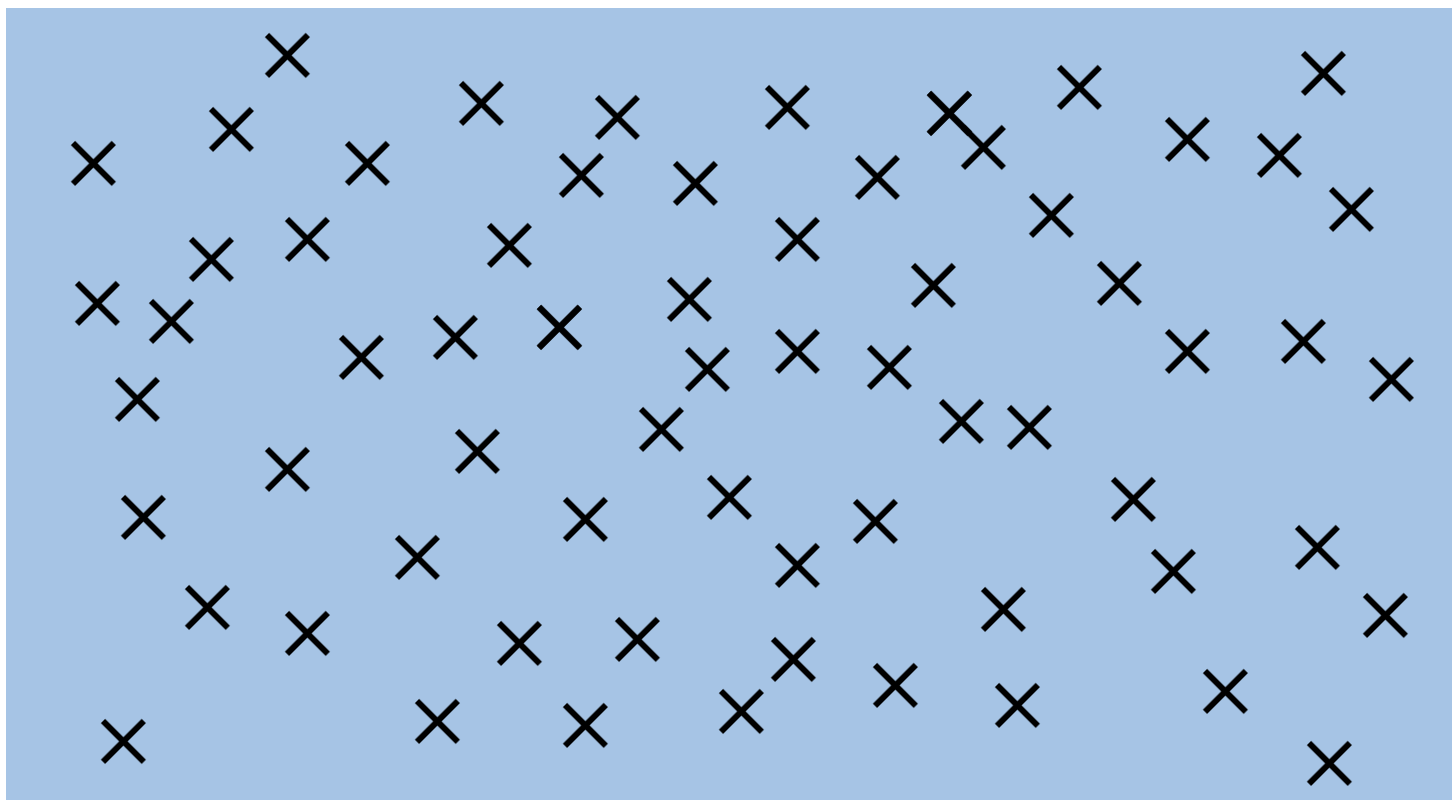

Você pode dividir o espaço vetorial em regiões e procurar dentro de uma região pelos vizinhos mais próximos de um vetor dado.

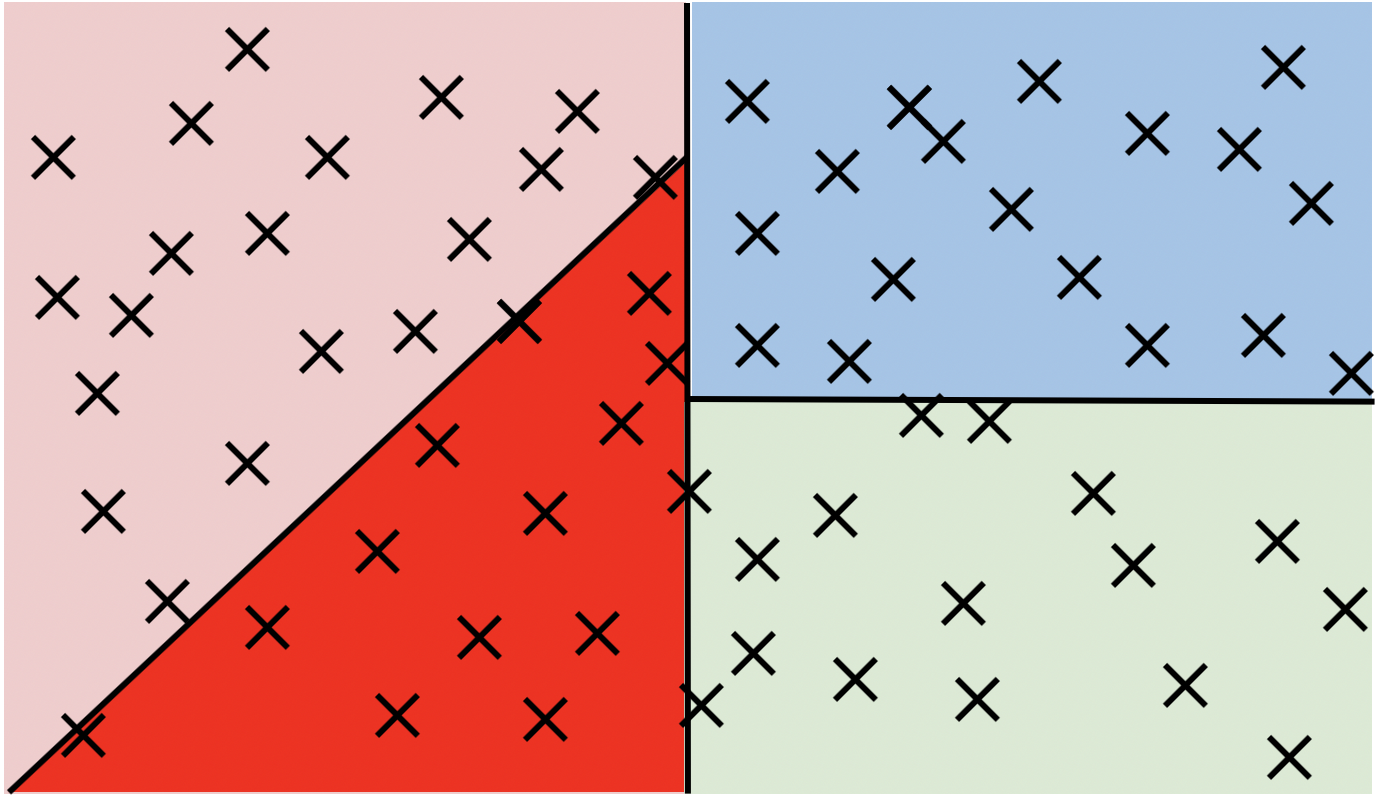

In [124]:
N_VECS = len(all_tweets)       # Número de vetores.
N_DIMS = len(ind2Tweet[1])     # Dimensionalidade do vetor.
print(f"O número de vetores é {N_VECS} e cada um tem {N_DIMS} dimensões.")

O número de vetores é 10000 e cada um tem 300 dimensões.


#### Escolhendo o número de planos

* Cada plano divide o espaço em 2 partes.
* Então, $ n $ planos dividem o espaço em $ 2^n $ baldes de hash.
* Queremos organizar 10.000 vetores de documentos em baldes para que cada balde tenha cerca de ~16 vetores.
* Para isso, precisamos de $ \frac{10000}{16} = 625 $ baldes.
* Estamos interessados em $ n $, o número de planos, para que $ 2^n = 625 $. Agora, podemos calcular $ n = \log_{2}(625) = 9.29 \approx 10 $.


In [125]:
# O número de planos. Usamos log2(625) para ter ~16 vetores/balde.
N_PLANES = 10
# Número de vezes para repetir o hashing para melhorar a busca.
N_UNIVERSES = 25

### Obtendo o Número de Hash para um Vetor

Para cada vetor, precisamos obter um número único associado a esse vetor para atribuí-lo a um "balde de hash".

#### Hipersuperfícies em Espaços Vetoriais
* Em um espaço vetorial tridimensional, a hipersuperfície é um plano regular. Em um espaço vetorial bidimensional, a hipersuperfície é uma linha.
* Geralmente, a hipersuperfície é um subespaço que tem uma dimensão a menos do que o espaço vetorial original.
* Uma hipersuperfície é definida exclusivamente pelo seu vetor normal.
* O vetor normal $ n $ do plano $ \pi $ é o vetor ao qual todos os vetores no plano $ \pi $ são ortogonais (perpendiculares no caso tridimensional).

#### Usando Hipersuperfícies para Dividir o Espaço Vetorial
Podemos usar uma hipersuperfície para dividir o espaço vetorial em 2 partes.
* Todos os vetores cujo produto escalar com o vetor normal do plano é positivo estão de um lado do plano.
* Todos os vetores cujo produto escalar com o vetor normal do plano é negativo estão do outro lado do plano.

#### Codificação de Baldes de Hash
* Para um vetor, podemos calcular seu produto escalar com todos os planos e, em seguida, codificar essas informações para atribuir o vetor a um único balde de hash.
* Quando o vetor está apontando para o lado oposto da hipersuperfície em relação ao normal, codifique-o como 0.
* Caso contrário, se o vetor estiver no mesmo lado que o vetor normal, codifique-o como 1.
* Se você calcular o produto escalar com cada plano na mesma ordem para todos os vetores, terá codificado o ID de hash exclusivo de cada vetor como um número binário, como [0, 1, 1, ... 0].

### valor_hash_do_vetor

Nós inicializamos a tabela de hash `hashes`. É uma lista de `N_UNIVERSES` matrizes, cada uma descreve sua própria tabela de hash. Cada matriz tem `N_DIMS` linhas e `N_PLANES` colunas. Cada coluna dessa matriz é um vetor normal de dimensão `N_DIMS` para cada um dos `N_PLANES` hipersuperfícies que são usadas para criar baldes da tabela de hash particular.

**Exercício**: Completar a função `hash_value_of_vector`, que coloca o vetor `v` no balde de hash correto.

* Primeiro, multiplique seu vetor `v` pelo plano correspondente. Isso lhe dará um vetor de dimensão (1, \text{N_planes}).
* Em seguida, converta cada elemento desse vetor para 0 ou 1.
* Crie um vetor de hash fazendo o seguinte: se o elemento for negativo, ele se torna 0; caso contrário, ele se torna 1.
* Então você calcula o número único para o vetor iterando sobre `N_PLANES`.
* Em seguida, multiplique $2^i$ vezes o bit correspondente (0 ou 1).
* Armazene essa soma na variável `hash_value`.

**Instruções:** Crie um hash para o vetor na função abaixo. Use a fórmula:

$$ hash = \sum_{i=0}^{N-1} \left( 2^{i} \times h_{i} \right) $$

#### Criar os conjuntos de planos
* Crie vários (25) conjuntos de planos (os planos que dividem a região).
* Você pode pensar nesses conjuntos como 25 maneiras separadas de dividir o espaço vetorial com um conjunto diferente de planos.
* Cada elemento desta lista contém uma matriz com 300 linhas (os vetores de palavras têm 300 dimensões) e 10 colunas (há 10 planos em cada "universo").

In [131]:
np.random.seed(0)
planes_l = [np.random.normal(size=(N_DIMS, N_PLANES))
            for _ in range(N_UNIVERSES)]

In [132]:
def hash_value_of_vector(v, planes):
    """Cria um hash para um vetor; hash_id indica qual hash aleatório usar.
    Entrada:
        - v: vetor do tweet. Sua dimensão é (1, N_DIMS)
        - planes: matriz de dimensão (N_DIMS, N_PLANES) - o conjunto de planos que divide a região
    Saída:
        - res: um número usado como hash para o seu vetor
    """

    # calcula o produto escalar entre o vetor e a matriz contendo os planos
    dot_product = np.dot(v, planes)
        
    # obtém o sinal do produto escalar (vetor de formato (1,10))
    sign_of_dot_product = np.sign(dot_product)

    # define h como falso (equivalente a 0 quando usado em operações) se o sinal for negativo,
    # e verdadeiro (equivalente a 1) se o sinal for positivo (vetor de formato (1,10))
    h = sign_of_dot_product >= 0

    # remove dimensões extras não usadas (converte de um array 2D para um array 1D)
    h = h.flatten()

    # inicializa o valor do hash como 0
    hash_value = 0

    n_planes = planes.shape[1]
    for i in range(n_planes):
        # incrementa o valor do hash por 2^i * h_i        
        hash_value += h[i] * (2 ** i)

    # converte hash_value para um inteiro
    hash_value = int(hash_value)

    return hash_value

In [133]:
np.random.seed(0)
idx = 0
planes = planes_l[idx]  # obtenha um 'universo' de planos para testar a função
vec = np.random.rand(1, 300)
print(f"O valor do hash para este vetor,",
      f"e o conjunto de planos no índice {idx},",
      f"é {hash_value_of_vector(vec, planes)}")

O valor do hash para este vetor, e o conjunto de planos no índice 0, é 768


### Criando uma Tabela de Hash

### criar_tabela_de_hash

Dado que você tem um número único para cada vetor (ou tweet), agora você deseja criar uma tabela de hash. Você precisa de uma tabela de hash para que, dado um `hash_id`, você possa rapidamente procurar os vetores correspondentes. Isso permite reduzir seu tempo de busca de forma significativa.

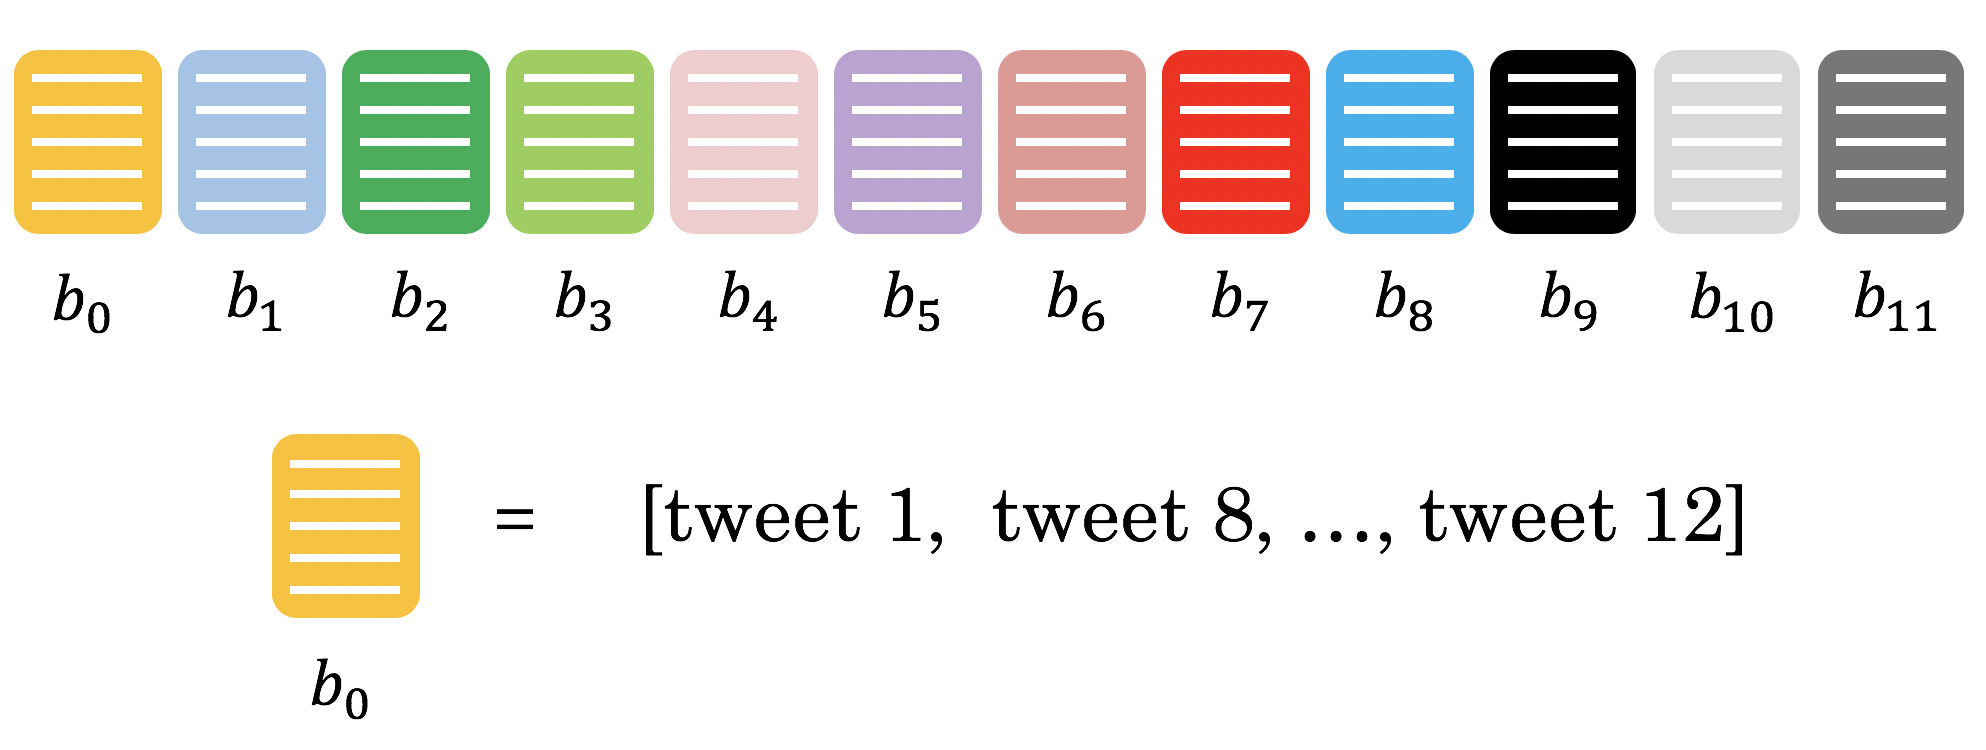

Nós fornecemos a função `make_hash_table`, que mapeia os vetores de tweet para um balde e armazena o vetor lá. Ela retorna a `hash_table` e a `id_table`. A `id_table` permite saber qual vetor em um determinado balde corresponde a qual tweet.

In [134]:
def make_hash_table(vecs, planes, hash_value_of_vector=hash_value_of_vector):
    """
    Entrada:
        - vecs: lista de vetores a serem hasheados.
        - planes: a matriz de planos em um único "universo", com formato (dimensões de embedding, número de planos).
    Saída:
        - hash_table: dicionário - chaves são hashes, valores são listas de vetores (baldes de hash)
        - id_table: dicionário - chaves são hashes, valores são listas de IDs de vetores
                    (é usado para saber qual tweet corresponde ao vetor hasheado)
    """
    # número de planos é o número de colunas na matriz de planos
    num_of_planes = planes.shape[1]

    # número de baldes é 2^(número de planos)
    num_buckets = 2**num_of_planes

    # cria a tabela de hash como um dicionário.
    # As chaves são inteiros (0,1,2... número de baldes)
    # Os valores são listas vazias
    hash_table = {i: [] for i in range(num_buckets)}

    # cria a tabela de IDs como um dicionário.
    # As chaves são inteiros (0,1,2... número de baldes)
    # Os valores são listas vazias
    id_table = {i: [] for i in range(num_buckets)}

    # para cada vetor em 'vecs'
    for i, v in enumerate(vecs):
        # calcula o valor do hash para o vetor
        h = hash_value_of_vector(v, planes)

        # armazena o vetor na hash_table na chave h,
        # adicionando o vetor v à lista na chave h
        hash_table[h].append(v)

        # armazena o índice do vetor 'i' (cada documento recebe um inteiro único 0,1,2...)
        # a chave é h, e o 'i' é adicionado à lista na chave h
        id_table[h].append(i)

    return hash_table, id_table

In [137]:
planes = planes_l[1]  # obter um 'universo' de planos para testar a função
tmp_hash_table, tmp_id_table = make_hash_table(document_vecs, planes)

print(f"A tabela de hash na chave 1 tem {len(tmp_hash_table[0])} vetores de documentos")
print(f"A tabela de IDs na chave 1 tem {len(tmp_id_table[0])} índices de documentos")
print(f"Os primeiros 5 índices de documentos armazenados na chave 0 da tabela de IDs são {tmp_id_table[0][0:5]}")

A tabela de hash na chave 1 tem 10 vetores de documentos
A tabela de IDs na chave 1 tem 10 índices de documentos
Os primeiros 5 índices de documentos armazenados na chave 0 da tabela de IDs são [1928, 2150, 2351, 3607, 4219]


### Criando Todas as Tabelas de Hash

Agora você pode hash seus vetores e armazená-los em uma tabela de hash que permite procurar rapidamente e buscar vetores semelhantes. Execute a célula abaixo para criar os hashes. Ao fazer isso, você terá várias tabelas que contêm todos os vetores. Dado um vetor, você identificará os baldes em todas as tabelas. Você pode então iterar sobre os baldes e considerar muitos menos vetores. Quanto mais tabelas você usar, mais precisa será sua busca, mas também mais tempo levará.


# Criando as tabelas de hash

In [138]:
def create_hash_id_tables(n_universes):
    hash_tables = []
    id_tables = []
    for universe_id in range(n_universes):  # há 25 hashes
        print('trabalhando no universo de hash #:', universe_id)
        planes = planes_l[universe_id]
        hash_table, id_table = make_hash_table(document_vecs, planes)
        hash_tables.append(hash_table)
        id_tables.append(id_table)
    
    return hash_tables, id_tables

hash_tables, id_tables = create_hash_id_tables(N_UNIVERSES)

trabalhando no universo de hash #: 0
trabalhando no universo de hash #: 1
trabalhando no universo de hash #: 2
trabalhando no universo de hash #: 3
trabalhando no universo de hash #: 4
trabalhando no universo de hash #: 5
trabalhando no universo de hash #: 6
trabalhando no universo de hash #: 7
trabalhando no universo de hash #: 8
trabalhando no universo de hash #: 9
trabalhando no universo de hash #: 10
trabalhando no universo de hash #: 11
trabalhando no universo de hash #: 12
trabalhando no universo de hash #: 13
trabalhando no universo de hash #: 14
trabalhando no universo de hash #: 15
trabalhando no universo de hash #: 16
trabalhando no universo de hash #: 17
trabalhando no universo de hash #: 18
trabalhando no universo de hash #: 19
trabalhando no universo de hash #: 20
trabalhando no universo de hash #: 21
trabalhando no universo de hash #: 22
trabalhando no universo de hash #: 23
trabalhando no universo de hash #: 24


### k-NN Aproximado

Implemente o k-vizinhos mais próximos aproximado usando hashing sensível à localidade para buscar documentos semelhantes a um documento dado no índice `doc_id`.

##### Entradas
* `doc_id` é o índice na lista de documentos `all_tweets`.
* `v` é o vetor do documento para o tweet em `all_tweets` no índice `doc_id`.
* `planes_l` é a lista de planos (a variável global criada anteriormente).
* `k` é o número de vizinhos mais próximos a serem pesquisados.
* `num_universes_to_use`: para economizar tempo, podemos usar menos do que o número total de universos disponíveis. Por padrão, está definido como `N_UNIVERSES`, que é 25 para esta tarefa.
* `hash_tables`: lista com tabelas de hash para cada universo.
* `id_tables`: lista com tabelas de ids para cada universo.

A função `approximate_knn` encontra um subconjunto de vetores candidatos que estão no mesmo "balde de hash" que o vetor de entrada 'v'. Em seguida, realiza a busca usual de k-vizinhos mais próximos nesse subconjunto (em vez de pesquisar entre todos os 10.000 tweets).

In [139]:
def approximate_knn(doc_id, v, planes_l, hash_tables, id_tables, k=1, num_universes_to_use=25, hash_value_of_vector=hash_value_of_vector):
    """Buscar k-NN usando hashes."""
    #assert num_universes_to_use <= N_UNIVERSES

    # Vetores que serão verificados como possíveis vizinhos mais próximos
    vecs_to_consider_l = list()

    # Lista de IDs de documentos
    ids_to_consider_l = list()

    # Criar um conjunto para IDs a considerar, para uma verificação mais rápida se um ID de documento já existe no conjunto
    ids_to_consider_set = set()

    # Loop através dos universos de planos
    for universe_id in range(num_universes_to_use):

        # Obter o conjunto de planos da lista planes_l, para este particular universe_id
        planes = planes_l[universe_id]

        # Obter o valor de hash do vetor para este conjunto de planos
        hash_value = hash_value_of_vector(v, planes)

        # Obter a tabela de hash para este particular universe_id
        hash_table = hash_tables[universe_id]

        # Obter a lista de vetores de documentos para esta tabela de hash, onde a chave é o hash_value
        document_vectors_l = hash_table[hash_value]

        # Obter a id_table para este particular universe_id
        id_table = id_tables[universe_id]

        # Obter o subconjunto de documentos a considerar como vizinhos mais próximos a partir deste dicionário id_table
        new_ids_to_consider = id_table[hash_value]

        # Loop através do subconjunto de vetores de documentos a considerar
        for i, new_id in enumerate(new_ids_to_consider):
            
            if doc_id == new_id:
                continue

            # Se o ID do documento ainda não estiver no conjunto ids_to_consider...
            if new_id not in ids_to_consider_set:
                # Acessar a lista document_vectors_l no índice i para obter a incorporação
                # então adicionar à lista de vetores a considerar como possíveis vizinhos mais próximos
                document_vector_at_i = document_vectors_l[i]
                vecs_to_consider_l.append(document_vector_at_i)

                # Adicionar o new_id (o índice para o documento) à lista de IDs a considerar
                ids_to_consider_l.append(new_id)

                # Também adicionar o new_id ao conjunto de IDs a considerar
                # (usar isso para verificar se new_id não está já nos IDs a considerar)
                ids_to_consider_set.add(new_id)


    # Agora execute k-NN no conjunto menor de vetores a considerar.
    print("Considerando rapidamente %d vetores" % len(vecs_to_consider_l))

    # Converter o conjunto de vetores a considerar para uma lista, e depois para um array numpy
    vecs_to_consider_arr = np.array(vecs_to_consider_l)

    # Chamar nearest neighbors na lista reduzida de vetores candidatos
    nearest_neighbor_idx_l = nearest_neighbor(v, vecs_to_consider_arr, k=k)

    # Usar a lista de índices dos vizinhos mais próximos como índices para os IDs a considerar
    # Criar uma lista de vizinhos mais próximos pelos IDs dos documentos
    nearest_neighbor_ids = [ids_to_consider_l[idx] for idx in nearest_neighbor_idx_l]

    return nearest_neighbor_ids

In [140]:
#document_vecs, ind2Tweet
doc_id = 0
doc_to_search = all_tweets[doc_id]
vec_to_search = document_vecs[doc_id]

In [141]:
# Sample
nearest_neighbor_ids = approximate_knn(
    doc_id, vec_to_search, planes_l, hash_tables, id_tables, k=3, num_universes_to_use=5)

Considerando rapidamente 79 vetores


In [142]:
print(f"Nearest neighbors for document {doc_id}")
print(f"Document contents: {all_tweets[doc_id]}")
print("")

for neighbor_id in nearest_neighbor_ids:
    print(f"Nearest neighbor at document id {neighbor_id}")
    print(f"Document contents: {all_tweets[neighbor_id]}")

Nearest neighbors for document 0
Document contents: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Nearest neighbor at document id 51
Document contents: #FollowFriday @France_Espana @reglisse_menthe @CCI_inter for being top engaged members in my community this week :)
Nearest neighbor at document id 1876
Document contents: #ShareTheLove @hotwifecleo @_PetPuK_ @omaro22omaro for being top HighValue members this week :)
Nearest neighbor at document id 105
Document contents: #FollowFriday @straz_das @DCarsonCPA @GH813600 for being top engaged members in my community this week :)
